#step 1: import the packages

reference: beleznay and kunimoto 2022.
https://watermark.silverchair.com/stac2179.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA3cwggNzBgkqhkiG9w0BBwagggNkMIIDYAIBADCCA1kGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMYyqk1AoUGPE-9vZ2AgEQgIIDKu5552AYlV37zh55o1_erXyASdtBoCoVqmN9t2MpBDfJcEoEf3P0Er30gxwvtg8yooVf217n5Fe_3ga7oxjo89vdh5VPN058z-RehjM7AFTskvjSxdqPfKxZ7UulYRI0TdCJFDdvtuSl2qp2RC5Y75NHt7snAGoT6vqcL4OjUmhw5QlsOBRDq_f-ONO0bzS4cCj328sRXiX4WaHT7N_SplaN6MtRsNhUQRT54sLZBFaz48KIv2D0QoRV_E-uo2Yz1NhNkZ6LjYSAsKsfsGGrxfd57CfLupSa-J0c3I6RKMnphMEH3HZva0lE8_6RxdlqW7BUHoaRxrtfvSwdebHuj2LJGsWQkxSYV_3FGzS8sVpzAySOADYB_VEU9IlRpd0mT9NYAbtwjtPESZE7o_qGqCtl5EQw6bfPAqDpEbg_tpK6bqWQSKkX61eV8fPMPPK1rbxd_vy5kj824NE4yh4VG6yPnqp6PB23bQHSCG80MhycB0hGPcnXpvad7JDV2wPILBWBAV4dH_ducmW9VZtSW34sNGtQguqMpu_BHKUOefFvV55YEht3tU1Wona5s37MHfQepljDEMomtZ4FAcM2NlP_jlUD0mGl5cOBacO_dD9FjvJtJQPAny4ROlLQxbAsUvS9j24Dr67P_BtX6JkoVbGxE617yzt_ILXVKGA1A1okIA5VFkKUJsnxNHyO6ugtaExW-xyNfmj62h1NzgrUoeM4mvMgYsrHXYLpY-UO7wvFUCBP_22_Pegg0BQq9LR30QThV-M_vyjHsDTjLJwMMSJS86an0q0tzTQY3pFNznPcnguQG0EQ0RMZAowmkQ3AR-gPCHwrgdlWM9S-FK35NI5hKP3snpN6nxwQzz8YW-LEY7YNR9U407qaPZUV_x_8jc3EjMzRfD9W9sbyR3TAcVuHkD7i1A8D0l5SuozJHtwbxbSjJVDIw58cR4MXntw5nao6fzv8EvTpRqOySofM6tasgnMJikU2gCDdnQyzCrnfz3V2pvscqA-_srMh_L6YR54VFRxdTKN2M-giL7V5NrvJ5Csu31FOCO0tkwmgzOhRVsTnZfd7GG6ioA

In [1]:
import jax

ModuleNotFoundError: No module named 'jax'

In [2]:
import pymultinest

ModuleNotFoundError: No module named 'pymultinest'

In [3]:
import ultranest

ModuleNotFoundError: No module named 'ultranest'

In [1]:
import dynesty

ModuleNotFoundError: No module named 'dynesty'

# First: find stars.

In [2]:
from astropy.io import fits
from astropy.table import Table

from astroquery.mast import Observations
from astroquery.mast import Tesscut

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.mast import Catalogs
# Observations.enable_cloud_dataset()

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import lightkurve

from tqdm import tqdm
from astroquery.exceptions import InvalidQueryError

# Important: ensure files are retrieved from AWS 
Observations.enable_cloud_dataset(provider='AWS')

In [1]:
# note: below I'm testing how long it takes to download from the Ctl

In [ ]:
# we want to make some cuts on the Tess Candidate Target List to find bright main-sequence stars. to-do: motivate the cuts.

In [5]:
%%time

catalog_data = Catalogs.query_criteria(catalog="Ctl",
                                       Tmag=[0, 10.5], 
                                      logg=[4.1,400],
                                      mass=[0.8, 1.05])

CPU times: user 8.63 s, sys: 1.23 s, total: 9.86 s
Wall time: 24.6 s


In [9]:
catalog_data

ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
str10,str8,int64,str12,str10,str16,str19,str19,str19,str8,int64,str4,str7,float64,float64,str7,float64,float64,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str1,str9,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str6,float64,float64,float64,float64,int64,str1,str8,str8,str15,float64,float64,float64,float64,float64,float64,int64,int64,str10
257486953,20190415,--,0004-01211-1,470-000036,00012257+0348137,1237678660350443525,J000122.66+034813.6,2740122790489701376,36101679,--,STAR,tmgaia2,0.344014992249018,3.80382001946707,tmgaia2,146.948,0.0785775,-2.18292,0.0365631,gaia2,8.86194,0.0507367,gaia2,99.6790809499965,-56.7907190407385,1.83033674668151,3.35274204776744,11.505,0.143,10.942,0.01,14.3561,0.00539245,11.5687,0.000667307,10.7394,0.000559878,10.5503,0.000599356,12.8011,0.0102534,9.525,0.026,9.107,0.024,9.042,0.021,AAA-222-111-000-0-0,nan,8.983,0.023,9.047,0.019,9.005,0.033,8.635,0.379,10.6881,0.00022,10.1918,0.006,rered,spect,5341.65,143.697,4.54113,0.0907658,-0.201,0.015,0.853239,0.0557889,0.923,0.117416,1.4859,0.389627,DWARF,0.5339956,0.01659735,112.48,0.647,0.0101352,0.0038456,27,0.03483629,--,--,0.0,0.00244247,0.00524873,panstarrs,0.10486,0.129972,0.0621553,0.0494226,0.31747,0.461784,0.0833452,0.0981863,0.0125266,0.0206681,0.643,0.651,bj2018,150.666,136.728,spect,11.0949,0.000455,10.1404,0.000426,1,--,tycho2v3,tycho2b3,planetcandidate,1.21935322296911,0.567092439365747,0.34464908190135,3.80381062101592,0.0422055151724629,0.0203261439774303,1,0,95867
388583226,20190415,--,4500-00124-1,849-000014,00004121+7940398,--,J000041.30+794039.9,564638150446547200,60652017,--,STAR,tmgaia2,0.171723066040282,79.6777485493965,tmgaia2,23.2049,0.0463689,0.752656,0.0441405,gaia2,6.3842,0.0331064,gaia2,120.572822336236,17.0392128647769,65.4255217247576,64.4779480185437,11.001,0.072,10.244,0.005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.922,0.027,8.612,0.033,8.523,0.021,AAA-122-111-000-0-0,nan,8.454,0.022,8.48,0.02,8.395,0.022,8.311,0.211,10.0725,0.001459,9.6085,0.0083,rered,gaia2,5655.0,121.218,4.14638,0.0746591,nan,nan,1.39908,0.066985,1.0,0.125138,0.365152,0.0760686,DWARF,1.80347264,0.0588778,155.936,0.811,0.0217066,0.008248645,157,0.0207567867,--,--,0.0025412635165229,0.00913321,0.00736408,panstarrs,0.0875932,0.162682,0.079991,0.0539789,0.0629468,0.0891903,0.074668,0.0746503,0.0552031,0.0625525,0.807,0.815,bj2018,134.725,107.712,dered,10.4504,0.004713,9.56295,0.00391,1,--,tycho2v3,tycho2b3,planetcandidate,0.936393976453562,0.684649721171938,0.172280648286862,79.677751790477,0.0266482483131485,0.02541745671

In [ ]:
# next, download a single star from this catalog to inspect the data type we're working with.

In [19]:
%%time
TESS_table = Observations.query_criteria(objectname='TIC ' + catalog_data['ID'][0]
                                         , obs_collection="TESS"
                                         , dataproduct_type='timeseries'
                                         ) 

data_products = Observations.get_product_list(TESS_table) 


CPU times: user 23.7 ms, sys: 611 μs, total: 24.3 ms
Wall time: 359 ms


In [32]:
data_products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str8,str4,str10,str47,str18,str1,str73,str7,str28,str2,str1,str4,str20,str3,str55,int64,str8,str6,int64,str4
63404332,TESS,timeseries,tess2021232031932-s0042-0000000257486953-0213-s,Light curves,S,mast:TESS/product/tess2021232031932-s0042-0000000257486953-0213-s_lc.fits,SCIENCE,Minimum Recommended Products,LC,--,SPOC,spoc-5.0.43-20210918,N/A,tess2021232031932-s0042-0000000257486953-0213-s_lc.fits,1863360,63404332,PUBLIC,3,TESS
63404332,TESS,timeseries,tess2021232031932-s0042-0000000257486953-0213-s,Target pixel files,S,mast:TESS/product/tess2021232031932-s0042-0000000257486953-0213-s_tp.fits,SCIENCE,Minimum Recommended Products,TP,--,SPOC,spoc-5.0.43-20210918,N/A,tess2021232031932-s0042-0000000257486953-0213-s_tp.fits,44939520,63404332,PUBLIC,2,TESS


In [35]:
# Keep only the science products
filtered = Observations.filter_products(data_products, productType="SCIENCE")

# Be selective about the columns we display
cols = ['obs_id', 'description', 'productSubGroupDescription']

# Look at the first five rows of the filtered results
filtered[0:10][cols]
ex_id = filtered[filtered['productSubGroupDescription']=='LC']['obs_id'][0]
# ex_id = filtered['obs_id'][0]

lc_prod = Observations.filter_products(data_products
                                      , obs_id = ex_id   
                                      )

# Download the lc file
lc_file = Observations.download_products(lc_prod)['Local Path'][0]

#Take a peek at the FITS file we downloaded
fits.info(lc_file)
lc_fits = fits.open(lc_file)

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257486953-0213-s/tess2021232031932-s0042-0000000257486953-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257486953-0213-s/tess2021232031932-s0042-0000000257486953-0213-s_tp.fits with expected size 44939520. [astroquery.mast.cloud]
Filename: ./mastDownload/TESS/tess2021232031932-s0042-0000000257486953-0213-s/tess2021232031932-s0042-0000000257486953-0213-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18342R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [36]:
lc = lc_fits[1].data
lc.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

Text(0.5, 0, 'TIME  (BJD-2457000)')

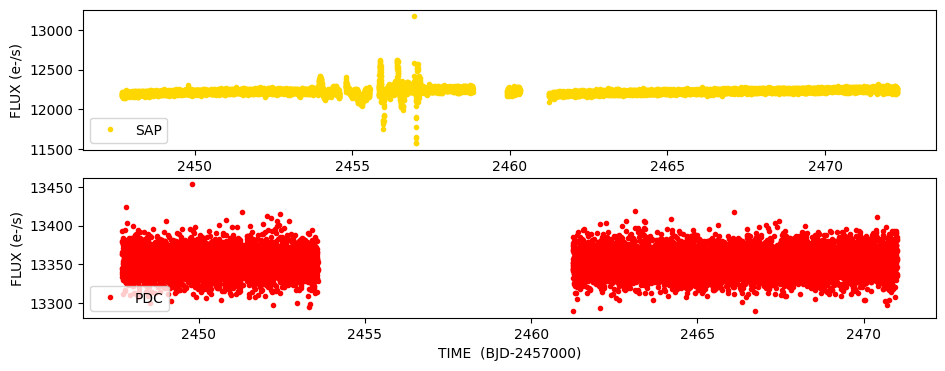

In [39]:
sapflux = lc['SAP_FLUX'] #SAP flux column
pdcflux = lc['PDCSAP_FLUX'] #PDCSAP flux column
time_lc = lc['TIME'] #time column

fig = plt.figure(figsize = (11,4))

fig.add_subplot(211)
plt.plot(time_lc, sapflux,'.', label = 'SAP', color = "gold")
plt.legend(loc = 'lower left')
plt.ylabel("FLUX (e-/s)")

fig.add_subplot(212)
plt.plot(time_lc, pdcflux,'.', label = 'PDC', color = "red")
plt.legend(loc = 'lower left')
plt.ylabel("FLUX (e-/s)")
plt.xlabel('TIME  (BJD-2457000)')

# Then: loop over and download all the files

In [ ]:
# explain that we're writing a function here. and lay out what each step does. first, here's the slow version.

In [40]:
def download_data(catalog_id):


    TESS_table = Observations.query_criteria(target_name=catalog_id
                                             , obs_collection="TESS"
                                             , dataproduct_type='timeseries'
                                             ) 
    try:
        data_products = Observations.get_product_list(TESS_table) 
    except InvalidQueryError:
        print('nothing found.')
        return [], []
        
    # Keep only the science products
    filtered = Observations.filter_products(data_products, productType="SCIENCE")
    
    # Be selective about the columns we display
    cols = ['obs_id', 'description', 'productSubGroupDescription']
    
    # Look at the first five rows of the filtered results
    filtered[0:10][cols]
    ex_id = filtered[filtered['productSubGroupDescription']=='LC']['obs_id'][0]
    
    lc_prod = Observations.filter_products(data_products
                                          , obs_id = ex_id   
                                          , productSubGroupDescription = "LC")
    
    # Download the lc file
    lc_file = Observations.download_products(lc_prod, cloud_only=True)['Local Path'][0]
    
    #Take a peek at the FITS file we downloaded
    lc_fits = fits.open(lc_file)
    lc = lc_fits[1].data
    sapflux = lc['SAP_FLUX'] #SAP flux column
    pdcflux = lc['PDCSAP_FLUX'] #PDCSAP flux column
    time_lc = lc['TIME'] #time column
    return time_lc, pdcflux


In [44]:
# todo: bulk query. multithreading and target_name each did a factor of 10 speedup. can i do one more factor of 10?

In [ ]:
# todo: explain all this cool multithreading that we're doing.

In [43]:
from concurrent.futures import ThreadPoolExecutor, as_completed

# todo: turn off printing, benchmark the function, what's the slow part?

def fetch_and_save_data(catalog_id):
    TESS_table = Observations.query_criteria(target_name=catalog_id
                                             , obs_collection="TESS"
                                             , dataproduct_type='timeseries'
                                             ) 
    try:
        data_products = Observations.get_product_list(TESS_table) 
    except InvalidQueryError:
        print('nothing found.')
        return [], []
    # Keep only the science products
    filtered = Observations.filter_products(data_products, productType="SCIENCE")
    
    # Be selective about the columns we display
    cols = ['obs_id', 'description', 'productSubGroupDescription']
    
    # Look at the first five rows of the filtered results
    filtered[0:10][cols]
    ex_id = filtered[filtered['productSubGroupDescription']=='LC']['obs_id'][0]
    
    lc_prod = Observations.filter_products(data_products
                                          , obs_id = ex_id   
                                          , productSubGroupDescription = "LC")
    
    # Download the lc file
    lc_file = Observations.download_products(lc_prod, cloud_only=True)['Local Path'][0]
    
    #Take a peek at the FITS file we downloaded
    lc_fits = fits.open(lc_file)
    lc = lc_fits[1].data
    sapflux = lc['SAP_FLUX'] #SAP flux column
    pdcflux = lc['PDCSAP_FLUX'] #PDCSAP flux column
    time_lc = lc['TIME'] #time column
    np.save(f'lc_data/{tic_id}', [time_lc, pdcflux])


# Use ThreadPoolExecutor to download files in parallel
total_tasks = len(catalog_data['ID'])
progress_bar = tqdm(total=total_tasks)
# for catalog_id in tqdm(catalog_data['ID'])
max_workers = 32  # Adjust this based on your system's capabilities
with ThreadPoolExecutor(max_workers=max_workers) as executor:
    futures = [executor.submit(fetch_and_save_data, catalog_id) for catalog_id in catalog_data['ID']]
    for future in as_completed(futures):
        progress_bar.update(1)

# Optionally wait for all futures to complete
for future in futures:
    future.result()


  0%|          | 5/53056 [00:20<61:22:33,  4.16s/it]


nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.


nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000238390147-0245-s/tess2022273165103-s0057-0000000238390147-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000418755864-0213-s/tess2021232031932-s0042-0000000418755864-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000388583226-0180-s/tess2020106103520-s0024-0000000388583226-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000437731913-0161-s/tess2019279210107-s0017-0000000437731913-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000326675379-0180-s/tess2020106103520-s0024-0000000326675379-0180-s_lc.fits with ex


  0%|          | 63/53056 [00:09<1:03:38, 13.88it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000437758624-0161-s/tess2019279210107-s0017-0000000437758624-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000466438502-0213-s/tess2021232031932-s0042-0000000466438502-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000419548998-0161-s/tess2019279210107-s0017-0000000419548998-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000440076425-0245-s/tess2022273165103-s0057-0000000440076425-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]


nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000044521997-0161-s/tess2019279210107-s0017-0000000044521997-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000058100737-0161-s/tess2019279210107-s0017-0000000058100737-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000044521831-0161-s/tess2019279210107-s0017-0000000044521831-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022138205153-s0052-0000000407117158-0224-s/tess2022138205153-s0052-0000000407117158-0224-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000440664131-0161-s/tess2019279210107-s0017-0000000440664131-0161-s_lc.fits with ex


  0%|          | 88/53056 [00:11<1:17:21, 11.41it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000429035781-0213-s/tess2021232031932-s0042-0000000429035781-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2023263165758-s0070-0000000257559437-0265-s/tess2023263165758-s0070-0000000257559437-0265-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000275260654-0180-s/tess2020106103520-s0024-0000000275260654-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000247333008-0245-s/tess2022273165103-s0057-0000000247333008-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000053676141-0161-s/tess2019279210107-s0017-0000000053676141-0161-s_lc.fits with ex


  0%|          | 104/53056 [00:14<1:33:18,  9.46it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000268127217-0161-s/tess2019279210107-s0017-0000000268127217-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000015532703-0245-s/tess2022273165103-s0057-0000000015532703-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000266012206-0213-s/tess2021232031932-s0042-0000000266012206-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000283424526-0161-s/tess2019279210107-s0017-0000000283424526-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 115/53056 [00:14<1:21:16, 10.86it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000435865614-0161-s/tess2019279210107-s0017-0000000435865614-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000240688062-0161-s/tess2019279210107-s0017-0000000240688062-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000053827592-0161-s/tess2019279210107-s0017-0000000053827592-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000115720764-0161-s/tess2019279210107-s0017-0000000115720764-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000053874284-0161-s/tess2019279210107-s0017-0000000053874284-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 123/53056 [00:15<1:16:46, 11.49it/s]

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000053875171-0245-s/tess2022273165103-s0057-0000000053875171-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000344712699-0213-s/tess2021232031932-s0042-0000000344712699-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000344770035-0213-s/tess2021232031932-s0042-0000000344770035-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022302161335-s0058-0000000379163992-0247-s/tess2022302161335-s0058-0000000379163992-0247-s_lc.fits with expected size 2027520. [astroquery.mast.cloud]


INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000435855821-0161-s/tess2019279210107-s0017-0000000435855821-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000344719838-0195-s/tess2020266004630-s0030-0000000344719838-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000436561089-0161-s/tess2019279210107-s0017-0000000436561089-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 129/53056 [00:16<1:28:31,  9.96it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000258779266-0161-s/tess2019279210107-s0017-0000000258779266-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257884205-0213-s/tess2021232031932-s0042-0000000257884205-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000259103558-0161-s/tess2019279210107-s0017-0000000259103558-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 134/53056 [00:17<1:35:39,  9.22it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000384882897-0161-s/tess2019279210107-s0017-0000000384882897-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000468351153-0162-s/tess2019306063752-s0018-0000000468351153-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.



  0%|          | 137/53056 [00:17<1:29:05,  9.90it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000344775105-0213-s/tess2021232031932-s0042-0000000344775105-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.



  0%|          | 140/53056 [00:17<1:27:56, 10.03it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000336890243-0213-s/tess2021232031932-s0042-0000000336890243-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2018263035959-s0003-0000000336891721-0123-s/tess2018263035959-s0003-0000000336891721-0123-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000243225983-0161-s/tess2019279210107-s0017-0000000243225983-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 143/53056 [00:17<1:28:32,  9.96it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000408261725-0213-s/tess2021232031932-s0042-0000000408261725-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000408239040-0161-s/tess2019279210107-s0017-0000000408239040-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 147/53056 [00:18<1:32:57,  9.49it/s]

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000016882023-0245-s/tess2022273165103-s0057-0000000016882023-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000408263470-0161-s/tess2019279210107-s0017-0000000408263470-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186456611-0161-s/tess2019279210107-s0017-0000000186456611-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 151/53056 [00:18<1:16:50, 11.47it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186453714-0161-s/tess2019279210107-s0017-0000000186453714-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186452098-0161-s/tess2019279210107-s0017-0000000186452098-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.



  0%|          | 153/53056 [00:19<1:46:00,  8.32it/s]


INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000380941208-0195-s/tess2020266004630-s0030-0000000380941208-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000376940662-0213-s/tess2021232031932-s0042-0000000376940662-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000422894521-0161-s/tess2019279210107-s0017-0000000422894521-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 156/53056 [00:19<1:27:54, 10.03it/s]


INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000411608989-0161-s/tess2019279210107-s0017-0000000411608989-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.


  0%|          | 160/53056 [00:20<3:14:05,  4.54it/s]

INFO: Found cached file ./mastDownload/TESS/tess2022302161335-s0058-0000000256206519-0247-s/tess2022302161335-s0058-0000000256206519-0247-s_lc.fits with expected size 2027520. [astroquery.mast.cloud]



  0%|          | 162/53056 [00:21<3:06:04,  4.74it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186537992-0161-s/tess2019279210107-s0017-0000000186537992-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000016995147-0161-s/tess2019279210107-s0017-0000000016995147-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 163/53056 [00:21<2:59:08,  4.92it/s]


INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000352412748-0161-s/tess2019279210107-s0017-0000000352412748-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000456868672-0213-s/tess2021232031932-s0042-0000000456868672-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000287969949-0161-s/tess2019279210107-s0017-0000000287969949-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000429052944-0213-s/tess2021232031932-s0042-0000000429052944-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000399724276-0213-s/tess2021232031932-s0042-0000000399724276-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 166/53056 [00:21<2:42:05,  5.44it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000405547496-0161-s/tess2019279210107-s0017-0000000405547496-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000400023154-0161-s/tess2019279210107-s0017-0000000400023154-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000422880573-0161-s/tess2019279210107-s0017-0000000422880573-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000456886165-0161-s/tess2019279210107-s0017-0000000456886165-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000326855162-0161-s/tess2019279210107-s0017-0000000326855162-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]



  0%|          | 179/53056 [00:21<32:41, 26.96it/s]  

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000365151928-0213-s/tess2021232031932-s0042-0000000365151928-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000018278446-0161-s/tess2019279210107-s0017-0000000018278446-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000239555803-0161-s/tess2019279210107-s0017-0000000239555803-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061287459-0161-s/tess2019279210107-s0017-0000000061287459-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000018112867-0161-s/tess2019279210107-s0017-0000000018112867-0161-s_lc.fits with expected size 1831680. [astroque


  0%|          | 187/53056 [00:22<36:14, 24.31it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061288380-0161-s/tess2019279210107-s0017-0000000061288380-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000080532557-0161-s/tess2019279210107-s0017-0000000080532557-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061288745-0161-s/tess2019279210107-s0017-0000000061288745-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000380943265-0195-s/tess2020266004630-s0030-0000000380943265-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000344279048-0195-s/tess2020266004630-s0030-0000000344279048-0195-s_lc.fits with expected size 199


KeyboardInterrupt



nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000346875963-0213-s/tess2021232031932-s0042-0000000346875963-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000026776835-0161-s/tess2019279210107-s0017-0000000026776835-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000385143456-0161-s/tess2019279210107-s0017-0000000385143456-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000422839848-0162-s/tess2019306063752-s0018-0000000422839848-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000060923144-0161-s/tess2019279210107-s0017-0000000060923144-0161-s_lc.fits with expected size 1831680. [astroque

ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000005722370-0162-s/tess2019306063752-s0018-0000000005722370-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000337074502-0213-s/tess2021232031932-s0042-0000000337074502-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done] [Done]

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000352177545-0161-s/tess2019279210107-s0017-0000000352177545-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO [Done]
: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000418373328-0162-s/tess2019306063752-s0018-0000000418373328-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-000000040525149

ERROR

nothing found.
nothing found.
nothing found.
nothing found.nothing found.
nothing found.

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000407338771-0161-s/tess2019279210107-s0017-0000000407338771-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000408778992-0213-s/tess2021232031932-s0042-0000000408778992-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000388633928-0162-s/tess2019306063752-s0018-0000000388633928-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000420071569-0198-s/tess2020294194027-s0031-0000000420071569-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess201930606


  0%|          | 189/53056 [00:40<36:14, 24.31it/s]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000127502123-0161-s/tess2019279210107-s0017-0000000127502123-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000056283917-0161-s/tess2019279210107-s0017-0000000056283917-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000468336149-0213-s/tess2021232031932-s0042-0000000468336149-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000279057562-0213-s/tess2021232031932-s0042-0000000279057562-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000044487929-0161-s/tess2019279210107-s0017-0000000044487929-0161-s_lc.fits with expected 

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000025762559-0161-s/tess2019279210107-s0017-0000000025762559-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000240778117-0161-s/tess2019279210107-s0017-0000000240778117-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000034821265-0162-s/tess2019306063752-s0018-0000000034821265-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000191418586-0161-s/tess2019279210107-s0017-0000000191418586-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000435861190-0161-s/tess2019279210107-s0017-000000043

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000293393463-0213-s/tess2021232031932-s0042-0000000293393463-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000200798849-0162-s/tess2019306063752-s0018-0000000200798849-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000238628788-0161-s/tess2019279210107-s0017-0000000238628788-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000435864557-0161-s/tess2019279210107-s0017-0000000435864557-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-00000002660

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000085794710-0182-s/tess2020133194932-s0025-0000000085794710-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000243153812-0161-s/tess2019279210107-s0017-0000000243153812-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000346900193-0162-s/tess2019306063752-s0018-0000000346900193-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000467836209-0162-s/tess2019306063752-s0018-0000000467836209-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/t

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000362028709-0125-s/tess2018319095959-s0005-0000000362028709-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000349386819-0214-s/tess2021258175143-s0043-0000000349386819-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000468902797-0200-s/tess2020324010417-s0032-0000000468902797-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000014155222-0213-s/tess2021232031932-s0042-0000000014155222-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000464770313-0200-s/tess2020324010417-s0032-0000000464770313-0200-s_lc.fits with expected size 190

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000461639857-0165-s/tess2019357164649-s0020-0000000461639857-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000151056019-0161-s/tess2019279210107-s0017-0000000151056019-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000150991345-0161-s/tess2019279210107-s0017-0000000150991345-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061520220-0161-s/tess2019279210107-s0017-0000000061520220-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000387012418-0213-s/tess20212

ERROR


INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000268148866-0214-s/tess2021258175143-s0043-0000000268148866-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000241068180-0161-s/tess2019279210107-s0017-0000000241068180-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000018798576-0214-s/tess2021258175143-s0043-0000000018798576-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000408345455-0164-s/tess2019331140908-s0019-0000000408345455-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownl

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000118007429-0245-s/tess2022273165103-s0057-0000000118007429-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000238301265-0245-s/tess2022273165103-s0057-0000000238301265-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000068810211-0214-s/tess2021258175143-s0043-0000000068810211-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000028293523-0161-s/tess2019279210107-s0017-0000000028293523-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000091374521-0161-s/tess2019279210107-s0017-00000000

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000306215787-0213-s/tess2021232031932-s0042-0000000306215787-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000194508677-0161-s/tess2019279210107-s0017-0000000194508677-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000306125356-0161-s/tess2019279210107-s0017-0000000306125356-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000439996850-0161-s/tess2019279210107-s0017-0000000439996850-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0042/0000/0004/1875/9634/tess2021232031932-s0042-0000000418759634

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000454225321-0200-s/tess2020324010417-s0032-0000000454225321-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020160202036-s0026-0000000428676038-0188-s/tess2020160202036-s0026-0000000428676038-0188-s_lc.fits with expected size 1820160. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000468800107-0164-s/tess2019331140908-s0019-0000000468800107-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000306955469-0161-s/tess2019279210107-s0017-0000000306955469-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000321039479-01

ERROR


 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000336893526-0213-s/tess2021232031932-s0042-0000000336893526-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000070752764-0164-s/tess2019331140908-s0019-0000000070752764-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000336957333-0213-s/tess2021232031932-s0042-0000000336957333-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.nothing found.

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000376921142-0213-s/tess2021232031932-s0042-0000000376921142-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000334091350-0164-s/tess2019331140908-s0019-0000000334091350-0164-s_lc.fit

ERROR


INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000097724459-0214-s/tess2021258175143-s0043-0000000097724459-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000399581357-0162-s/tess2019306063752-s0018-0000000399581357-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000318805701-0198-s/tess2020294194027-s0031-0000000318805701-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000436839853-0162-s/tess2019306063752-s0018-0000000436839853-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000020806382-0162-s/tess2019306063752-s0018-00000000208

ERROR

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000080600267-0161-s/tess2019279210107-s0017-0000000080600267-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000365074016-0213-s/tess2021232031932-s0042-0000000365074016-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000385141431-0161-s/tess2019279210107-s0017-0000000385141431-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000436876199-0162-s/tess2019306063752-s0018-0000000436876199-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000456862570-0161-s/tess2019279210107-s0017-0000000456862570

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000083713508-0214-s/tess2021258175143-s0043-0000000083713508-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000321252567-0165-s/tess2019357164649-s0020-0000000321252567-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000262821804-0195-s/tess2020266004630-s0030-0000000262821804-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO [Done]
INFO [Done]
: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000026762776-0161-s/tess2019279210107-s0017-0000000026762776-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000055248321-0165-s/tess2019357164649-s0020-0000000055248321-01

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000346939648-0214-s/tess2021258175143-s0043-0000000346939648-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000354309878-0162-s/tess2019306063752-s0018-0000000354309878-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000082376960-0162-s/tess2019306063752-s0018-0000000082376960-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000415878637-0162-s/tess2019306063752-s0018-0000000415878637-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000028831960-0162-s/tess2019306063752-s0018-0000000028831960-0162-s_lc.fits with expected size 1785600. [astroque

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000172219408-0165-s/tess2019357164649-s0020-0000000172219408-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000097347591-0213-s/tess2021232031932-s0042-0000000097347591-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000399832820-0162-s/tess2019306063752-s0018-0000000399832820-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000253027808-0165-s/tess2019357164649-s0020-0000000253027808-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000184612564-0162-s/tess2019306063752-s0018-0000000184612564-0162-s_lc.fits with expected size 17

ERROR

nothing found.
nothing found.nothing found.
: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000416741424-0198-s/tess2020294194027-s0031-0000000416741424-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000201037374-0162-s/tess2019306063752-s0018-0000000201037374-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000435303966-0213-s/tess2021232031932-s0042-0000000435303966-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022138205153-s0052-0000000417455549-0224-s/tess2022138205153-s0052-0000000417455549-0224-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
 [Done]
 [Done]
INFOnothing found.
: Found cached file ./mastDownload/TESS/tess20202941940

ERROR

 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000358031485-0182-s/tess2020133194932-s0025-0000000358031485-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000301262047-0162-s/tess2019306063752-s0018-0000000301262047-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000420031394-0198-s/tess2020294194027-s0031-0000000420031394-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
nothing found.
: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000453829990-0125-s/tess2018319095959-s0005-0000000453829990-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000293063166-0162-s/tess201930606

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000417756169-0165-s/tess2019357164649-s0020-0000000417756169-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000459921733-0125-s/tess2018319095959-s0005-0000000459921733-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000356741990-0200-s/tess2020324010417-s0032-0000000356741990-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000371426141-0213-s/tess2021232031932-s0042-0000000371426141-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000034579372-01

ERROR

 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000348722360-0200-s/tess2020324010417-s0032-0000000348722360-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000347572104-0198-s/tess2020294194027-s0031-0000000347572104-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000356222578-0164-s/tess2019331140908-s0019-0000000356222578-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000440780049-0215-s/tess2021284114741-s0044-0000000440780049-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000434227248-0215-s/tess2021284114741-s0044-0000000434227248-0215-s_lc.fits with expected size 1776960. 

ERROR

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000426473795-0213-s/tess2021232031932-s0042-0000000426473795-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000058543027-0214-s/tess2021258175143-s0043-0000000058543027-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000420644542-0182-s/tess2020133194932-s0025-0000000420644542-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000365512637-0125-s/tess2018319095959-s0005-0000000365512637-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-000000005843

ERROR

 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000245786317-0214-s/tess2021258175143-s0043-0000000245786317-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000067905871-0165-s/tess2019357164649-s0020-0000000067905871-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000141677416-0165-s/tess2019357164649-s0020-0000000141677416-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
 [Done]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000349356562-0162-s/tess2019306063752-s0018-0000000349356562-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Fou

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000280183047-0204-s/tess2021014023720-s0034-0000000280183047-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000114027034-0213-s/tess2021232031932-s0042-0000000114027034-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000281571831-0182-s/tess2020133194932-s0025-0000000281571831-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000071395225-0165-s/tess2019357164649-s0020-0000000071395225-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022330142927-s0059-0000000399889529-0248-s/tess2022330142927-s0059-0000000399889529-0248-s_lc.fits with expected size 193

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2023289093419-s0071-0000000393765498-0266-s/tess2023289093419-s0071-0000000393765498-0266-s_lc.fits with expected size 1897920. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000452749710-0200-s/tess2020324010417-s0032-0000000452749710-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000459859093-0182-s/tess2020133194932-s0025-0000000459859093-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000098971488-0165-s/tess2019357164649-s0020-0000000098971488-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
nothing found.
 [Done]INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000281607894-0182-s/tess2020133194932-s0025-00000002

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000345413785-0125-s/tess2018319095959-s0005-0000000345413785-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000140775904-0182-s/tess2020133194932-s0025-0000000140775904-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000038956035-0165-s/tess2019357164649-s0020-0000000038956035-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000017748599-0215-s/tess2021284114741-s0044-0000000017748599-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000399815068-0200-s/tess2020324010417-s0032-0000000399815068-0200-s_lc.fits

ERROR

 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000071457277-0165-s/tess2019357164649-s0020-0000000071457277-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000440701115-0213-s/tess2021232031932-s0042-0000000440701115-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000455004756-0200-s/tess2020324010417-s0032-0000000455004756-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
 [Done]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0005/0000/0004/1544/4082/tess2018319095959-s0005-0000000415444082-0125-s_lc.fits to ./mastDownload/TESS/tess2018319095959-s0005-0000000415444082-0125-s/tess2018319095959-s0005-0000000415444082-0125-s_lc.fits ...INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s00

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000142103501-0165-s/tess2019357164649-s0020-0000000142103501-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000407943502-0200-s/tess2020324010417-s0032-0000000407943502-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000150906065-0245-s/tess2022273165103-s0057-0000000150906065-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000194504523-0161-s/tess2019279210107-s0017-0000000194504523-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000019247822-0214-s/tess2021258175143-s0043-0000000019247822

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000367152179-0214-s/tess2021258175143-s0043-0000000367152179-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000283722863-0125-s/tess2018319095959-s0005-0000000283722863-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
 [Done]

INFO: Found cached file ./mastDownload/TESS/tess2018349182500-s0006-0000000264744540-0126-s/tess2018349182500-s0006-0000000264744540-0126-s_lc.fits with expected size 1598400. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2023263165758-s0070-0000000017097407-0265-s/tess2023263165758-s0070-0000000017097407-0265-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDow

ERROR

nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000376591459-0165-s/tess2019357164649-s0020-0000000376591459-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000424010318-0245-s/tess2022273165103-s0057-0000000424010318-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000070749798-0164-s/tess2019331140908-s0019-0000000070749798-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000267742748-0161-s/tess2019279210107-s0017-0000000267742748-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000328068896-0213-s/tess202123

ERROR

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000435858229-0161-s/tess2019279210107-s0017-0000000435858229-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000440268315-0164-s/tess2019331140908-s0019-0000000440268315-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000357939252-0182-s/tess2020133194932-s0025-0000000357939252-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
nothing found.
 [Done]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000018585208-0214-s/tess2021258175143-s0043-0000000018585208-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]

nothing found.
nothing found.
 [Done] [Done]

 [Done]
INFO: Found cached file 

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000322349079-0164-s/tess2019331140908-s0019-0000000322349079-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020351194500-s0033-0000000282200781-0203-s/tess2020351194500-s0033-0000000282200781-0203-s_lc.fits with expected size 1892160. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000435867945-0161-s/tess2019279210107-s0017-0000000435867945-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000068893269-0214-s/tess2021258175143-s0043-0000000068893269-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
not

ERROR

nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000269114736-0200-s/tess2020324010417-s0032-0000000269114736-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000243150747-0161-s/tess2019279210107-s0017-0000000243150747-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000339499777-0165-s/tess2019357164649-s0020-0000000339499777-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000352321694-0161-s/tess2019279210107-s0017-0000000352321694-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000240856131-0161-s/tess2019

ERROR

 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000258866681-0245-s/tess2022273165103-s0057-0000000258866681-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000055133531-0165-s/tess2019357164649-s0020-0000000055133531-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000022499582-0161-s/tess2019279210107-s0017-0000000022499582-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000373236404-0180-s/tess2020106103520-s0024-0000000373236404-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000022566917-0161-s/tess20192

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000376939954-0213-s/tess2021232031932-s0042-0000000376939954-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000333875835-0165-s/tess2019357164649-s0020-0000000333875835-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000411696721-0200-s/tess2020324010417-s0032-0000000411696721-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2023289093419-s0071-0000000062016730-0266-s/tess2023289093419-s0071-0000000062016730-0266-s_lc.fits with expected size 1897920. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothi

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000396817255-0165-s/tess2019357164649-s0020-0000000396817255-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000172418589-0165-s/tess2019357164649-s0020-0000000172418589-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000444896305-0165-s/tess2019357164649-s0020-0000000444896305-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000357233448-0165-s/tess2019357164649-s0020-0000000357233448-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000055502126-0165-s/tess2019357164649-s0020-0000000055502126-0165-s_lc.fits with expected 

ERROR

 [Done]
nothing found.
nothing found.
nothing found.
 [Done]
nothing found.

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257322770-0213-s/tess2021232031932-s0042-0000000257322770-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000440669996-0161-s/tess2019279210107-s0017-0000000440669996-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000373560146-0164-s/tess2019331140908-s0019-0000000373560146-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000055598706-0165-s/tess2019357164649-s0020-0000000055598706-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000191338444-0161-s/tess2019279210107-s0017-0000000191338444-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000240676896-0161-s/tess2019279210107-s0017-0000000240676896-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000080601945-0161-s/tess2019279210107-s0017-0000000080601945-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000238661093-0161-s/tess2019279210107-s0017-0000000238661093-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000388766534-0213-s/tess2021232031932-s0042-0000000388766534-0213-s_lc.fits with expected size 1863360. [astroquery.mast

ERROR

 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000333138083-0161-s/tess2019279210107-s0017-0000000333138083-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO [Done]
: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000126984091-0161-s/tess2019279210107-s0017-0000000126984091-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000283428748-0161-s/tess2019279210107-s0017-0000000283428748-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000369490916-0195-s/tess2020266004630-s0030-0000000369490916-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000238626074-0161-s/tess2019279210107-s0017-00000002

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000468356052-0162-s/tess2019306063752-s0018-0000000468356052-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061578310-0161-s/tess2019279210107-s0017-0000000061578310-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000428751277-0162-s/tess2019306063752-s0018-0000000428751277-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000026822270-0161-s/tess2019279210107-s0017-0000000026822270-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.nothing found.

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-000000011367609

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000302843968-0165-s/tess2019357164649-s0020-0000000302843968-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000427693293-0161-s/tess2019279210107-s0017-0000000427693293-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000456856081-0245-s/tess2022273165103-s0057-0000000456856081-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000411610563-0214-s/tess2021258175143-s0043-0000000411610563-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.nothing found.
nothing found.
nothing found.
nothing found.

nothing found.
nothing foun

ERROR

nothing found.

INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000399732990-0195-s/tess2020266004630-s0030-0000000399732990-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061233959-0161-s/tess2019279210107-s0017-0000000061233959-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000091328572-0161-s/tess2019279210107-s0017-0000000091328572-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000028353048-0161-s/tess2019279210107-s0017-0000000028353048-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000392071108-0165-s/tess2019357164649-s0020-0000000392071108-0165-s_lc.fits with expected size 19

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000395605126-0162-s/tess2019306063752-s0018-0000000395605126-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000085079478-0165-s/tess2019357164649-s0020-0000000085079478-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000097328342-0213-s/tess2021232031932-s0042-0000000097328342-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000137266048-0162-s/tess2019306063752-s0018-0000000137266048-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000191767122-0162-s/tess2019306063752-s0018-000000

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000461638812-0165-s/tess2019357164649-s0020-0000000461638812-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000097665516-0214-s/tess2021258175143-s0043-0000000097665516-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000322467943-0165-s/tess2019357164649-s0020-0000000322467943-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000274666561-0164-s/tess2019331140908-s0019-0000000274666561-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000322548569-0164-s/tess2019331140908-s0019-0000000322548569-0164-s_lc.fits with e

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000070584323-0215-s/tess2021284114741-s0044-0000000070584323-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000441598153-0165-s/tess2019357164649-s0020-0000000441598153-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000365201650-0213-s/tess2021232031932-s0042-0000000365201650-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000456909420-0161-s/tess2019279210107-s0017-0000000456909420-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000239975508-0214-s/tess2021258175143-s0043-0000000239975508-0214-s_lc.fits with expected size 1811520. [astroque

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000067470562-0165-s/tess2019357164649-s0020-0000000067470562-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000285271396-0162-s/tess2019306063752-s0018-0000000285271396-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]

 [Done] [Done]

 [Done]
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000408628165-0213-s/tess2021232031932-s0042-0000000408628165-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
 [Done]
INFOnothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000129906855-0162-s/tess2019306063752-s0018-0000000129906855-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s00

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000189882529-0165-s/tess2019357164649-s0020-0000000189882529-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000071431780-0165-s/tess2019357164649-s0020-0000000071431780-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000021128464-0162-s/tess2019306063752-s0018-0000000021128464-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000062741572-0215-s/tess2021284114741-s0044-0000000062741572-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000241178231-0165-s/tess2019357164649-s0020-0000000241178231-0165-s_

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000171299535-0165-s/tess2019357164649-s0020-0000000171299535-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000408777331-0213-s/tess2021232031932-s0042-0000000408777331-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000266481024-0204-s/tess2021014023720-s0034-0000000266481024-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000266480400-0204-s/tess2021014023720-s0034-0000000266480400-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing foun

ERROR

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000284767398-0215-s/tess2021284114741-s0044-0000000284767398-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
 [Done]
 [Done]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0031/0000/0004/2284/8901/tess2020294194027-s0031-0000000422848901-0198-s_lc.fits to ./mastDownload/TESS/tess2020294194027-s0031-0000000422848901-0198-s/tess2020294194027-s0031-0000000422848901-0198-s_lc.fits ... [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000022898396-0162-s/tess2019306063752-s0018-0000000022898396-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000141100018-0165-s/tess2019357164649-s0020-0000000141100018-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached f

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000408626902-0213-s/tess2021232031932-s0042-0000000408626902-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000088229378-0165-s/tess2019357164649-s0020-0000000088229378-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000335458723-0165-s/tess2019357164649-s0020-0000000335458723-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000011832755-0165-s/tess2019357164649-s0020-0000000011832755-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000202842992-0162-s/tess2019306063752-s0018-0000000202842992-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
nothing found.

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000061045922-0213-s/tess2021232031932-s0042-0000000061045922-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000014248232-0165-s/tess2019357164649-s0020-0000000014248232-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000077544535-0162-s/tess2019306063752-s0018-0000000077544535-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000252920562-0165-s/tess2019357164649-s0020

ERROR


nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257996701-0213-s/tess2021232031932-s0042-0000000257996701-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018292075959-s0004-0000000258807009-0124-s/tess2018292075959-s0004-0000000258807009-0124-s_lc.fits with expected size 1897920. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000091436734-0213-s/tess2021232031932-s0042-0000000091436734-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000337417637-0213-s/tess2021232031932-s0042-0000000337417637-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000436931408-

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000255739320-0215-s/tess2021284114741-s0044-0000000255739320-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000422962418-0162-s/tess2019306063752-s0018-0000000422962418-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.nothing found.
nothing found.

nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000141615422-0165-s/tess2019357164649-s0020-0000000141615422-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000377362922-0165-s/tess2019357164649-s0020-0000000377362922-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached f

ERROR

 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000051902793-0165-s/tess2019357164649-s0020-0000000051902793-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000186663755-0162-s/tess2019306063752-s0018-0000000186663755-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000150072653-0165-s/tess2019357164649-s0020-0000000150072653-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000243203867-0213-s/tess2021232031932-s0042-0000000243203867-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000192318055-0162-s/tess2019306063752-s0018-0000000192318055-0162-s_

ERROR

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022302161335-s0058-0000000384728447-0247-s/tess2022302161335-s0058-0000000384728447-0247-s_lc.fits with expected size 2027520. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000365427770-0198-s/tess2020294194027-s0031-0000000365427770-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000470983497-0165-s/tess2019357164649-s0020-0000000470983497-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000026860040-0215-s/tess2021284114741-s0044-0000000026860040-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000444989863-0165-s/tess201935716464

ERROR

nothing found.
nothing found.nothing found.

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000458748152-0162-s/tess2019306063752-s0018-0000000458748152-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000303472161-0198-s/tess2020294194027-s0031-0000000303472161-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000280323840-0182-s/tess2020133194932-s0025-0000000280323840-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000302769751-0198-s/tess2020294194027-s0031-0000000302769751-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000467609577-0162-s/tess2019306063752-s0018-0000000467609577-0162-s_l

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000468936922-0204-s/tess2021014023720-s0034-0000000468936922-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000071454597-0165-s/tess2019357164649-s0020-0000000071454597-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0042/0000/0004/3528/6744/tess2021232031932-s0042-0000000435286744-0213-s_lc.fits to ./mastDownload/TESS/tess2021232031932-s0042-0000000435286744-0213-s/tess2021232031932-s0042-0000000435286744-0213-s_lc.fits ...
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000346723819-0162-s/tess2019306063752-s0018-0000000346723819-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000434132186-0213-s/tess

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000171556086-0165-s/tess2019357164649-s0020-0000000171556086-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000059038880-0125-s/tess2018319095959-s0005-0000000059038880-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000069365250-0204-s/tess2021014023720-s0034-0000000069365250-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000256699619-0182-s/tess2020133194932-s0025-0000000256699619-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.nothing found.

INFO: Found cached file ./mastDownload/TESS/tess20

ERROR


 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000373105811-0200-s/tess2020324010417-s0032-0000000373105811-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000345451200-0125-s/tess2018319095959-s0005-0000000345451200-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
 [Done]nothing found.

nothing found.nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000103450344-0182-s/tess2020133194932-s0025-0000000103450344-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000242963730-0213-s/tess2021232031932-s0042-0000000242963730-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000150059351-0214-s/t

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000452766572-0125-s/tess2018319095959-s0005-0000000452766572-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000142044942-0165-s/tess2019357164649-s0020-0000000142044942-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000454157853-0200-s/tess2020324010417-s0032-0000000454157853-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
 [Done]nothing found.

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000260273161-0182-s/tess2020133194932-s0025-0000000260273161-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
nothing found. [Done]



ERROR

INFODownloading URL s3://stpubdata/tess/public/tid/s0059/0000/0001/2162/0867/tess2022330142927-s0059-0000000121620867-0248-s_lc.fits to ./mastDownload/TESS/tess2022330142927-s0059-0000000121620867-0248-s/tess2022330142927-s0059-0000000121620867-0248-s_lc.fits ...: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000027042104-0214-s/tess2021258175143-s0043-0000000027042104-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000027087895-0214-s/tess2021258175143-s0043-0000000027087895-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000293409577-0214-s/tess2021258175143-s0043-0000000293409577-0214-s_lc.fits with expected size 1811520. [astroquery.ma

ERROR

nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000006373070-0214-s/tess2021258175143-s0043-0000000006373070-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000436570231-0125-s/tess2018319095959-s0005-0000000436570231-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
 [Done]
nothing found.nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000408434172-0164-s/tess2019331140908-s0019-0000000408434172-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000391418327-0164-s/tess2019331140908-s0019-0000000391418327-0164-s_lc.fits with expected size 1834560.

ERROR: Error pulling from S3 bucket: Socket operation on non-socket [astroquery.mast.observations]


nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022330142927-s0059-0000000440185440-0248-s/tess2022330142927-s0059-0000000440185440-0248-s_lc.fits with expected size 1932480. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000080612282-0214-s/tess2021258175143-s0043-0000000080612282-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000306114844-0164-s/tess2019331140908-s0019-0000000306114844-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000066572037-0164-s/tess2019331140908-s0019-0000000066572037-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess201933114

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000014335162-0165-s/tess2019357164649-s0020-0000000014335162-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020351194500-s0033-0000000270889166-0203-s/tess2020351194500-s0033-0000000270889166-0203-s_lc.fits with expected size 1892160. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000068943393-0165-s/tess2019357164649-s0020-0000000068943393-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000088357767-0218-s/tess2021364111932-s0047-0000000088357767-0218-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000101685372-0215-s/tess2021284114741-s0044-0

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000018749840-0165-s/tess2019357164649-s0020-0000000018749840-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000147791553-0218-s/tess2021364111932-s0047-0000000147791553-0218-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000060847893-0215-s/tess2021284114741-s0044-0000000060847893-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000444989106-0165-s/tess2019357164649-s0020-0000000444989106-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2020351194500-s0033-0000000247915

ERROR


nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000016426398-0165-s/tess2019357164649-s0020-0000000016426398-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
nothing found.nothing found.

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000141535403-0165-s/tess2019357164649-s0020-0000000141535403-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000191967836-0165-s/tess2019357164649-s0020-0000000191967836-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2018349182500-s0006-0000000235436901-0126-s/tess2018349182500-s0006-0000000235436901-0126-s_lc.fits with expected size 1598400. [astroquery.mast.cloud]


ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000367435286-0165-s/tess2019357164649-s0020-0000000367435286-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000239122485-0165-s/tess2019357164649-s0020-0000000239122485-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000441583136-0165-s/tess2019357164649-s0020-0000000441583136-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000371113189-0165-s/tess2019357164649-s0020-0000000371113189-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0071/0000/0000/6095/0345/tess2023289093419-s0071-0000000060950

ERROR

: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000432549095-0161-s/tess2019279210107-s0017-0000000432549095-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000441633615-0165-s/tess2019357164649-s0020-0000000441633615-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000022469621-0161-s/tess2019279210107-s0017-0000000022469621-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000461356882-0180-s/tess2020106103520-s0024-0000000461356882-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000405189926-0213-s/tess2021232031932-s0042-0000000405189926-0213-s_lc.fits with expected size 1863360. [astroquery.mast.clo

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000407459603-0180-s/tess2020106103520-s0024-0000000407459603-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000044523196-0161-s/tess2019279210107-s0017-0000000044523196-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0017/0000/0000/8053/1040/tess2019279210107-s0017-0000000080531040-0161-s_lc.fits to ./mastDownload/TESS/tess2019279210107-s0017-0000000080531040-0161-s/tess2019279210107-s0017-0000000080531040-0161-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done] [Done]

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257569746-0213-s/tess2021232031932-s0042-0000000257569746-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279

ERROR

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000283428089-0161-s/tess2019279210107-s0017-0000000283428089-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000243169218-0161-s/tess2019279210107-s0017-0000000243169218-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257436049-0213-s/tess2021232031932-s0042-0000000257436049-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000384881914-0161-s/tess2019279210107-s0017-0000000384881914-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000174442721-0161-s/tess2019279210107-s0017-0000000174442721

ERROR

nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000085342946-0161-s/tess2019279210107-s0017-0000000085342946-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
 [Done]
INFOnothing found.
 [Done]


ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000293361638-0213-s/tess2021232031932-s0042-0000000293361638-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000080531735-0161-s/tess2019279210107-s0017-0000000080531735-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000437758644-0161-s/tess2019279210107-s0017-0000000437758644-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000067465915-0162-s/tess2019306063752-s0018-0000000067465915-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000404677184-0213-s/tess2021232031932-s0042-0000000404677184-0213-s_lc.fi

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000186990840-0162-s/tess2019306063752-s0018-0000000186990840-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000331748649-0162-s/tess2019306063752-s0018-0000000331748649-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000250798169-0162-s/tess2019306063752-s0018-0000000250798169-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000434223590-0161-s/tess2019279210107-s0017-0000000434223590-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000402373902-0162-s/te

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000395943415-0162-s/tess2019306063752-s0018-0000000395943415-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000021023541-0162-s/tess2019306063752-s0018-0000000021023541-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000013936287-0161-s/tess2019279210107-s0017-0000000013936287-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000053874993-0245-s/tess2022273165103-s0057-0000000053874993-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000352295702-0161-s/tess2019279210107-s0017-0000000352295702-0161-

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257865922-0213-s/tess2021232031932-s0042-0000000257865922-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000436924733-0162-s/tess2019306063752-s0018-0000000436924733-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000387586369-0198-s/tess2020294194027-s0031-0000000387586369-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
nothing found.

nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000468698976-0180-s/tess2020106103520-s0024-0000000468698976-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
INFO: Foun

ERROR

 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000101303904-0162-s/tess2019306063752-s0018-0000000101303904-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000347572882-0198-s/tess2020294194027-s0031-0000000347572882-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done] [Done]
 [Done]

nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000346923041-0213-s/tess2021232031932-s0042-0000000346923041-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000029016713-0213-s/tess2021232031932-s0042-0000000029016713-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]INFO: Found cached file ./mas

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000026856113-0161-s/tess2019279210107-s0017-0000000026856113-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000028675625-0161-s/tess2019279210107-s0017-0000000028675625-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000029109961-0162-s/tess2019306063752-s0018-0000000029109961-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000020884302-0161-s/tess2019279210107-s0017-0000000020884302-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000327789522-0

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000403039006-0162-s/tess2019306063752-s0018-0000000403039006-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000137057085-0162-s/tess2019306063752-s0018-0000000137057085-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000194814570-0162-s/tess2019306063752-s0018-0000000194814570-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000091375822-0161-s/tess2019279210107-s0017-0000000091375822-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000404690286-0213-s/tess2021232031932-s0042-0000000404690286-0213-s_lc.fits with expected 

ERROR

nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000311149203-0198-s/tess2020294194027-s0031-0000000311149203-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000114026621-0213-s/tess2021232031932-s0042-0000000114026621-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000279442159-0162-s/tess2019306063752-s0018-0000000279442159-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000292464362-0162-s/tess2019306063752-s0018-0000000292464362-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000113983306-0213-s/tess2021232031932-s0042-00000001139833

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000256739006-0165-s/tess2019357164649-s0020-0000000256739006-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000468879107-0125-s/tess2018319095959-s0005-0000000468879107-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000395774966-0162-s/tess2019306063752-s0018-0000000395774966-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2023263165758-s0070-0000000014080077-0265-s/tess2023263165758-s0070-0000000014080077-0265-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000203

ERROR

nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000056396602-0214-s/tess2021258175143-s0043-0000000056396602-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000440730336-0213-s/tess2021232031932-s0042-0000000440730336-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000415388457-0200-s/tess2020324010417-s0032-0000000415388457-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000258806431-0198-s/tess2020294194027-s0031-0000000258806431-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000387535165-0198-s/tess2020294194027-s0031-0000000387535165-0198-s_lc.fits

ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000052096727-0213-s/tess2021232031932-s0042-0000000052096727-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000381731277-0162-s/tess2019306063752-s0018-0000000381731277-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
nothing found.nothing found.

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000436862182-0162-s/tess2019306063752-s0018-0000000436862182-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000467755856-0164-s/tess2019331140908-s0019-0000000467755856-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached 

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000428863342-0165-s/tess2019357164649-s0020-0000000428863342-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000017458245-0214-s/tess2021258175143-s0043-0000000017458245-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000302450310-0213-s/tess2021232031932-s0042-0000000302450310-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000113882205-0213-s/tess2021232031932-s0042-0000000113882205-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000177768556-0162-s/tess2019306063752-s0018-0

ERROR

 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000445915893-0125-s/tess2018319095959-s0005-0000000445915893-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000297904202-0182-s/tess2020133194932-s0025-0000000297904202-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000059039270-0125-s/tess2018319095959-s0005-0000000059039270-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000068753054-0214-s/tess2021258175143-s0043-0000000068753054-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000084333679-0162-s/tess2019306063752-s0018-000000008433367

ERROR

 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000415507738-0200-s/tess2020324010417-s0032-0000000415507738-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000286711963-0164-s/tess2019331140908-s0019-0000000286711963-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000014228383-0213-s/tess2021232031932-s0042-0000000014228383-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000094549493-0162-s/tess2019306063752-s0018-0000000094549493-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000102676539-0182-s/tess2020133194932-s0025-0000000

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000260155262-0164-s/tess2019331140908-s0019-0000000260155262-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000389017493-0214-s/tess2021258175143-s0043-0000000389017493-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
 [Done]
nothing found.nothing found.

nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.INFO
: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000142056765-0165-s/tess2019357164649-s0020-0000000142056765-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000420577951-0164-s/tess2019331140908-s0019-0000000420577951-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TES

ERROR

 [Done]
 [Done]
 [Done] [Done]

INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000082804309-0164-s/tess2019331140908-s0019-0000000082804309-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000345669978-0200-s/tess2020324010417-s0032-0000000345669978-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000416310083-0164-s/tess2019331140908-s0019-0000000416310083-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000320833408-0164-s/tess2019331140908-s0019-0000000320833408-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000

ERROR

nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000245820685-0200-s/tess2020324010417-s0032-0000000245820685-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000412192007-0200-s/tess2020324010417-s0032-0000000412192007-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000452772342-0125-s/tess2018319095959-s0005-0000000452772342-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000457248952-0200-s/tess2020324010417-s0032-0000000457248952-0200-s_lc.fits with expected size 1903680. [astr

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000373263744-0125-s/tess2018319095959-s0005-0000000373263744-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000373313768-0125-s/tess2018319095959-s0005-0000000373313768-0125-s_lc.fits with expected size 1923840. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000322036255-0164-s/tess2019331140908-s0019-0000000322036255-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000138354424-0165-s/tess2019357164649-s0020-0000000138354424-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2018319095959-s0005-0000000450071073-0

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2022357055054-s0060-0000000426674943-0249-s/tess2022357055054-s0060-0000000426674943-0249-s_lc.fits with expected size 1880640. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000189718316-0165-s/tess2019357164649-s0020-0000000189718316-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000468419830-0164-s/tess2019331140908-s0019-0000000468419830-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000445805961-0165-s/tess2

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000191834345-0165-s/tess2019357164649-s0020-0000000191834345-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000055530696-0165-s/tess2019357164649-s0020-0000000055530696-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000240145414-0165-s/tess2019357164649-s0020-0000000240145414-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000101439755-0214-s/tess2021258175143-s0043-0000000101439755-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020160202036-s0026-0000

ERROR

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000067507717-0165-s/tess2019357164649-s0020-0000000067507717-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000453410545-0165-s/tess2019357164649-s0020-0000000453410545-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000328375733-0165-s/tess2019357164649-s0020-0000000328375733-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000468836048-0165-s/tess2019357164649-s0020-0000000468836048-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess202101402

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000083609916-0214-s/tess2021258175143-s0043-0000000083609916-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000009270648-0218-s/tess2021364111932-s0047-0000000009270648-0218-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000055218756-0165-s/tess2019357164649-s0020-0000000055218756-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020160202036-s0026-0000000071476791-0188-s/tess2020160202036-s0026-0000000071476791-0188-s_lc.fits with expected size 1820160. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000067379286-0215-s/tess2021284114741-s0044-0000000067379286-0215-s

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000071457172-0165-s/tess2019357164649-s0020-0000000071457172-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
INFO [Done]
: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000086542819-0214-s/tess2021258175143-s0043-0000000086542819-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000081073808-0165-s/tess2019357164649-s0020-0000000081073808-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000060284171-0215-s/tess2021284114741-s0044-0000000060284171-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess201935

ERROR

nothing found.
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000090936059-0165-s/tess2019357164649-s0020-0000000090936059-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000302426786-0165-s/tess2019357164649-s0020-0000000302426786-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000172411359-0165-s/tess2019357164649-s0020-0000000172411359-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000191814286-0165-s/tess2019357164649-s0020-0000000191814286-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cache

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000099567755-0165-s/tess2019357164649-s0020-0000000099567755-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000156891215-0165-s/tess2019357164649-s0020-0000000156891215-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000165196388-0215-s/tess2021284114741-s0044-0000000165196388-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000470969737-0165-s/tess2019357164649-s0020-0000000470969737-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000458388564-0165-s/tess2019357164649-s0020-0000000458388564-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000039644669-0165-s/tess2019357164649-s0020-0000000039644669-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000019067842-0215-s/tess2021284114741-s0044-0000000019067842-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000017900989-0218-s/tess2021364111932-s0047-0000000017900989-0218-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
nothing found.nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000333792787-0165-s

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000014435003-0215-s/tess2021284114741-s0044-0000000014435003-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000293265620-0213-s/tess2021232031932-s0042-0000000293265620-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000202432815-0161-s/tess2019279210107-s0017-0000000202432815-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000401427741-0213-s/tess2021232031932-s0042-0000000401427741-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000331804827-0161-s/tess2019279210107-s0017-0000000331804827-0161-s_lc.fits with expected size 1831680. [

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000414826067-0161-s/tess2019279210107-s0017-0000000414826067-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000060909353-0245-s/tess2022273165103-s0057-0000000060909353-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000411525468-0245-s/tess2022273165103-s0057-0000000411525468-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000240823301-0162-s/tess2019306063752-s0018-0000000240823301-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000191135104-0161-s/tess2019279210107-s0017-00000001

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000414960166-0161-s/tess2019279210107-s0017-0000000414960166-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000044672921-0161-s/tess2019279210107-s0017-0000000044672921-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000400062856-0161-s/tess2019279210107-s0017-0000000400062856-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000196694631-0161-s/tess2019279210107-s0017-0000000196694631-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000420682944-0162-s/tess2019306063752-s0018-0000000420682944-0162-s_lc.fits with ex

ERROR

 [Done]
 [Done] [Done]

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000061045432-0162-s/tess2019306063752-s0018-0000000061045432-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000288497990-0162-s/tess2019306063752-s0018-0000000288497990-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000247043672-0162-s/tess2019306063752-s0018-0000000247043672-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000073626744-0162-s/tess2019306063752-s0018-0000000073626744-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000139533174-

ERROR

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000194664126-0162-s/tess2019306063752-s0018-0000000194664126-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000137910089-0162-s/tess2019306063752-s0018-0000000137910089-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000381166314-0198-s/tess2020294194027-s0031-0000000381166314-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000046429314-0162-s/tess2019306063752-s0018-0000000046429314-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000405460035-0162-s/tess20193

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000150096950-0214-s/tess2021258175143-s0043-0000000150096950-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000018583347-0214-s/tess2021258175143-s0043-0000000018583347-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000337422279-0214-s/tess2021258175143-s0043-0000000337422279-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000059963587-0214-s/tess2021258175143-s0043-0000000059963587-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TES

ERROR

INFOnothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000054183934-0214-s/tess2021258175143-s0043-0000000054183934-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000302488137-0200-s/tess2020324010417-s0032-0000000302488137-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
nothing found. [Done]
 [Done]

 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
 [Done]nothing found.
 [Done]


ERROR

nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018349182500-s0006-0000000389246713-0126-s/tess2018349182500-s0006-0000000389246713-0126-s_lc.fits with expected size 1598400. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000264629142-0200-s/tess2020324010417-s0032-0000000264629142-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000321831584-0164-s/tess2019331140908-s0019-0000000321831584-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.nothing found.

nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000076790531-0214-s/tess2021258175143-s0043-0000000076790531-0214-s_lc.fits with expected size 1811520

ERROR

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000417012753-0165-s/tess2019357164649-s0020-0000000417012753-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000353636908-0165-s/tess2019357164649-s0020-0000000353636908-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000190169809-0165-s/tess2019357164649-s0020-0000000190169809-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000253018880-0165-s/tess2019357164649-s0020-0000000253018880-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2023341045131-s0073-0000000189852739-0268-s/tess2023341045131-s0073-0000000189852739-0268-s_lc.fits

ERROR

 [Done]
nothing found.
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000238393072-0245-s/tess2022273165103-s0057-0000000238393072-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000194324757-0161-s/tess2019279210107-s0017-0000000194324757-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020351194500-s0033-0000000425170941-0203-s/tess2020351194500-s0033-0000000425170941-0203-s_lc.fits with expected size 1892160. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000367437505-0165-s/tess2019357164649-s0020-0000000367437505-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess20

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000004298631-0165-s/tess2019357164649-s0020-0000000004298631-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000328375400-0165-s/tess2019357164649-s0020-0000000328375400-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000127419512-0161-s/tess2019279210107-s0017-0000000127419512-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000415818004-0161-s/tess2019279210107-s0017-0000000415818004-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000060910281-0245-s/tess2022273165103-s0057-0000000060910281-0245-s_lc.fits with expected 

ERROR

nothing found.
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000440673789-0161-s/tess2019279210107-s0017-0000000440673789-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000191145234-0161-s/tess2019279210107-s0017-0000000191145234-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000441619923-0165-s/tess2019357164649-s0020-0000000441619923-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000171523537-0165-s/tess2019357164649-s0020-0000000171523537-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000252974268-0218-s/tess2021364111932-s0047-0000000252974268-0218-s_lc.fi

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000293393553-0213-s/tess2021232031932-s0042-0000000293393553-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000333566723-0213-s/tess2021232031932-s0042-0000000333566723-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000060256808-0215-s/tess2021284114741-s0044-0000000060256808-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000099725941-0165-s/tess2019357164649-s0020-0000000099725941-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess20201

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000240826434-0161-s/tess2019279210107-s0017-0000000240826434-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000352318468-0161-s/tess2019279210107-s0017-0000000352318468-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO [Done]


ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000352411798-0161-s/tess2019279210107-s0017-0000000352411798-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000081211888-0165-s/tess2019357164649-s0020-0000000081211888-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000301918882-0161-s/tess2019279210107-s0017-0000000301918882-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000265015162-0131-s/tess2019006130736-s0007-0000000265015162-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000071163618-0165-s/tess2019357164649-s0020-000000007116361

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000388814394-0195-s/tess2020266004630-s0030-0000000388814394-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000127020072-0161-s/tess2019279210107-s0017-0000000127020072-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000369494072-0213-s/tess2021232031932-s0042-0000000369494072-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000381343573-0161-s/tess2019279210107-s0017-0000000381343573-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000365069443-0213-s/t

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000060924809-0161-s/tess2019279210107-s0017-0000000060924809-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257921764-0213-s/tess2021232031932-s0042-0000000257921764-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000430313173-0213-s/tess2021232031932-s0042-0000000430313173-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO [Done]: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000407413523-0162-s/tess2019306063752-s0018-0000000407413523-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000091376194-0161-s/tess20

ERROR

nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000336961037-0213-s/tess2021232031932-s0042-0000000336961037-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000347511694-0213-s/tess2021232031932-s0042-0000000347511694-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFOnothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000118296157-0162-s/tess2019306063752-s0018-0000000118296157-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000292402590-0162-s/tess2019306063752-s0018-0000000292402590-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]


ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000247009492-0162-s/tess2019306063752-s0018-0000000247009492-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022138205153-s0052-0000000397233697-0224-s/tess2022138205153-s0052-0000000397233697-0224-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000186938895-0162-s/tess2019306063752-s0018-0000000186938895-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000005675248-0213-s/tess2021232031932-s0042-0000000005675248-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000246980292-0162-s/tess2019306063752-s0018-0000000246980292-0162-s_lc.fits with expected size 1785600. [astroquery.mast

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000302150081-0162-s/tess2019306063752-s0018-0000000302150081-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000387493859-0215-s/tess2021284114741-s0044-0000000387493859-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018292075959-s0004-0000000387598387-0124-s/tess2018292075959-s0004-0000000387598387-0124-s_lc.fits with expected size 1897920. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000192468220-0162-s/tess2019306063752-s0018-0000000192468220-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found. [Done]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000113809598-0213-s/tess2021232031932-s0042-000000011380959

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000035084851-0162-s/tess2019306063752-s0018-0000000035084851-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000302500800-0213-s/tess2021232031932-s0042-0000000302500800-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000186668413-0162-s/tess2019306063752-s0018-0000000186668413-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000445925246-0198-s/tess2020294194027-s0031-0000000445925246-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]nothing found.

nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.Downloading URL s3://stpubdata/tess

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022330142927-s0059-0000000467830638-0248-s/tess2022330142927-s0059-0000000467830638-0248-s_lc.fits with expected size 1932480. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000243015470-0200-s/tess2020324010417-s0032-0000000243015470-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000094474202-0162-s/tess2019306063752-s0018-0000000094474202-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000103034816-0182-s/tess2020133194932-s0025-0000000103034816-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022330142927-s0059-0000000266500992-0248-s/tess2022330142927-s0059-0000000266500992-0248-s_lc.fits with expected size 193

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000066209707-0164-s/tess2019331140908-s0019-0000000066209707-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000450054242-0200-s/tess2020324010417-s0032-0000000450054242-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000389755384-0200-s/tess2020324010417-s0032-0000000389755384-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000468403289-0182-s/tess2020133194932-s0025-0000000468403289-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-00000004683

ERROR

 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000061866717-0214-s/tess2021258175143-s0043-0000000061866717-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000311271011-0200-s/tess2020324010417-s0032-0000000311271011-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000062464906-0214-s/tess2021258175143-s0043-0000000062464906-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2018349182500-s0006-0000000264463063-0126-s/tess2018349182500-s0006-0000000264463063-0126-s_lc.fits with expected size 1598400. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TES

ERROR

nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000083381437-0214-s/tess2021258175143-s0043-0000000083381437-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020351194500-s0033-0000000415559726-0203-s/tess2020351194500-s0033-0000000415559726-0203-s_lc.fits with expected size 1892160. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000241245805-0165-s/tess2019357164649-s0020-0000000241245805-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000339500975-0165-s/tess2019357164649-s0020-0000000339500975-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000426529268-0214-s/t

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000353760411-0165-s/tess2019357164649-s0020-0000000353760411-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000302362971-0165-s/tess2019357164649-s0020-0000000302362971-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000302397191-0165-s/tess2019357164649-s0020-0000000302397191-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000397849509-0165-s/tess2019357164649-s0020-0000000397849509-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-00000000553

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000095010878-0215-s/tess2021284114741-s0044-0000000095010878-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000085158873-0165-s/tess2019357164649-s0020-0000000085158873-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000241162974-0165-s/tess2019357164649-s0020-0000000241162974-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000270096345-0131-s/tess2019006130736-s0007-0000000270096345-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0047/0000/0003/7127/1941/tess2021364111932-s0047-0000000371271941-0218-s_lc.fits to ./mastDownload/TESS/tess2021364

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000452974141-0204-s/tess2021014023720-s0034-0000000452974141-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000334482328-0131-s/tess2019006130736-s0007-0000000334482328-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000334412602-0204-s/tess2021014023720-s0034-0000000334412602-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000016771528-0165-s/tess2019357164649-s0020-0000000016771528-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000027629711-0131-s/tess2019006130736-s0007-0000000

ERROR


INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000354532520-0161-s/tess2019279210107-s0017-0000000354532520-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000178266267-0215-s/tess2021284114741-s0044-0000000178266267-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000258876983-0245-s/tess2022273165103-s0057-0000000258876983-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000038398342-0213-s/tess2021232031932-s0042-0000000038398342-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000403021108-0213-s/tess2021232031932-s0042-0000000403021108-0213-s_lc.fits with

ERROR

 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186447934-0161-s/tess2019279210107-s0017-0000000186447934-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000058856360-0161-s/tess2019279210107-s0017-0000000058856360-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000044629738-0161-s/tess2019279210107-s0017-0000000044629738-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0003/0000/0003/9973/3476/tess2018263035959-s0003-0000000399733476-0123-s_lc.fits to ./mastDownload/TESS/tess2018263035959-s0003-0000000399733476-0123-s/tess2018263035959-s0003-0000000399733476-0123-s_lc.fits ...INFO: Found cached file ./mastDownload/TESS/tess201

ERROR

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000318928983-0198-s/tess2020294194027-s0031-0000000318928983-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000238737598-0162-s/tess2019306063752-s0018-0000000238737598-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000428073480-0162-s/tess2019306063752-s0018-0000000428073480-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020294194027-s0031-0000000328232251-0198-s/tess2020294194027-s0031-0000000328232251-0198-s_lc.fits with expected size 1860480. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022302161335-s0058-0000000116141414-0247-s/tess20223021613

ERROR

nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000137398935-0182-s/tess2020133194932-s0025-0000000137398935-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000090666569-0162-s/tess2019306063752-s0018-0000000090666569-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000028871369-0162-s/tess2019306063752-s0018-0000000028871369-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000279851119-0164-s/tess2019331140908-s0019-0000000279851119-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000418208503-0164-s/tess201933114090

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2018292075959-s0004-0000000453821336-0124-s/tess2018292075959-s0004-0000000453821336-0124-s_lc.fits with expected size 1897920. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000046478551-0162-s/tess2019306063752-s0018-0000000046478551-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000385508765-0213-s/tess2021232031932-s0042-0000000385508765-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000015757189-0214-s/tess2021258175143-s0043-0000000015757189-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000018546715-0214-s/tess2021258175143-s0043-0000000018546715-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000245863402-0200-s/tess2020324010417-s0032-0000000245863402-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000436725149-0214-s/tess2021258175143-s0043-0000000436725149-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000268507466-0164-s/tess2019331140908-s0019-0000000268507466-0164-s_lc.fits with expected size 1834560. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000103565184-0182-s/tess2020133194932-s0025-0000000103565184-0182-s_lc.fits with expected

ERROR

 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020324010417-s0032-0000000412199356-0200-s/tess2020324010417-s0032-0000000412199356-0200-s_lc.fits with expected size 1903680. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000138400979-0165-s/tess2019357164649-s0020-0000000138400979-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000078697656-0214-s/tess2021258175143-s0043-0000000078697656-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019331140908-s0019-0000000274670943-0164-s/tess2019331140908-s0019-0000000274670943-0164-s_lc.fits with expected size 18345

ERROR

nothing found.
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2018349182500-s0006-0000000438487453-0126-s/tess2018349182500-s0006-0000000438487453-0126-s_lc.fits with expected size 1598400. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020351194500-s0033-0000000337270216-0203-s/tess2020351194500-s0033-0000000337270216-0203-s_lc.fits with expected size 1892160. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000015929304-0165-s/tess2019357164649-s0020-0000000015929304-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000436952521-0215-s/tess2021284114741-s0044-0000000436952521-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./ma

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000014398033-0165-s/tess2019357164649-s0020-0000000014398033-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000149831807-0165-s/tess2019357164649-s0020-0000000149831807-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000355007974-0165-s/tess2019357164649-s0020-0000000355007974-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000252947703-0165-s/tess2019357164649-s0020-0000000252947703-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
nothing found.
nothing found.
 [Done]INFO: Found cached file ./mastDownload/TESS/tess2019357164

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000070333274-0215-s/tess2021284114741-s0044-0000000070333274-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000441592534-0165-s/tess2019357164649-s0020-0000000441592534-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000067509994-0165-s/tess2019357164649-s0020-0000000067509994-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000457095344-0218-s/tess2021364111932-s0047-0000000457095344-0218-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000271016622-0131-s/tess2019006130736-s0007-0000000271016622-0131-s_lc.fits with expected

ERROR

 [Done]
 [Done]
 [Done]
: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000099008432-0165-s/tess2019357164649-s0020-0000000099008432-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000220594926-0204-s/tess2021014023720-s0034-0000000220594926-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000333793957-0165-s/tess2019357164649-s0020-0000000333793957-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000458616184-0131-s/tess2019006130736-s0007-0000000458616184-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000171518076-0165-s/tess2019357164649-s0020-0000000171

ERROR

 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000265011503-0204-s/tess2021014023720-s0034-0000000265011503-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0047/0000/0004/0071/0296/tess2021364111932-s0047-0000000400710296-0218-s_lc.fits to ./mastDownload/TESS/tess2021364111932-s0047-0000000400710296-0218-s/tess2021364111932-s0047-0000000400710296-0218-s_lc.fits ...
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000027304791-0165-s/tess2019357164649-s0020-0000000027304791-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000154453484-0165-s/tess2019357164649-s0020-0000000154453484-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess20190061

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000443906058-0131-s/tess2019006130736-s0007-0000000443906058-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000080964277-0165-s/tess2019357164649-s0020-0000000080964277-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000265010889-0131-s/tess2019006130736-s0007-0000000265010889-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000287082561-0218-s/tess2021364111932-s0047-0000000287082561-0218-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000073480679-0165-s/tess2019357164649-s0020-0000000073480679-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]


ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000444001291-0204-s/tess2021014023720-s0034-0000000444001291-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000142215906-0165-s/tess2019357164649-s0020-0000000142215906-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFOINFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000283786963-0204-s/tess2021014023720-s0034-0000000283786963-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000458684021-0204-s/tess2021014023720-s0034-0000000458684021-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]


ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000467158905-0165-s/tess2019357164649-s0020-0000000467158905-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000029170089-0167-s/tess2020020091053-s0021-0000000029170089-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000467158766-0165-s/tess2019357164649-s0020-0000000467158766-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000284893583-0167-s/tess2020020091053-s0021-0000000284893583-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000457102860-0165-s/tess2019357164649-s0020-0000000457102860-0165-s_lc.fits with expected size 1926720. [ast

ERROR

 [Done]
: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000457104615-0165-s/tess2019357164649-s0020-0000000457104615-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000126236560-0167-s/tess2020020091053-s0021-0000000126236560-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000126238229-0167-s/tess2020020091053-s0021-0000000126238229-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000355208171-0167-s/tess2020020091053-s0021-0000000355208171-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019032160000-s0008-0000000283786171-0136-s/tess2019032160000-s0008-0000000283786171-0136-s_lc.fits with expected size 180576

ERROR

nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0021/0000/0001/2623/6648/tess2020020091053-s0021-0000000126236648-0167-s_lc.fits to ./mastDownload/TESS/tess2020020091053-s0021-0000000126236648-0167-s/tess2020020091053-s0021-0000000126236648-0167-s_lc.fits ...
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000285007557-0167-s/tess2020020091053-s0021-0000000285007557-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000008744330-0167-s/tess2020020091053-s0021-0000000008744330-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000279823785-0167-s/tess2020020091053-s0021-0000000279823785-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done] [Done]

 [Done]Downloading URL s3://st

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000086037189-0215-s/tess2021284114741-s0044-0000000086037189-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000149394777-0167-s/tess2020020091053-s0021-0000000149394777-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000149398323-0167-s/tess2020020091053-s0021-0000000149398323-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000307907802-0167-s/tess2020020091053-s0021-0000000307907802-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000251085162-0218-s/tess2021364111932-s0047-0000000251085162-0218-s_lc.fits with expected 

ERROR

 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000172533278-0167-s/tess2020020091053-s0021-0000000172533278-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000020162458-0167-s/tess2020020091053-s0021-0000000020162458-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000155013584-0216-s/tess2021310001228-s0045-0000000155013584-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000172533774-0167-s/tess2020020091053-s0021-0000000172533774-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000017191738-0219-s/tess2022027120115-s0048-0000000

ERROR

nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000284852092-0204-s/tess2021014023720-s0034-0000000284852092-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
 [Done]INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000073328533-0165-s/tess2019357164649-s0020-0000000073328533-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]

 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000366395801-0204-s/tess2021014023720-s0034-0000000366395801-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]


ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000014503215-0215-s/tess2021284114741-s0044-0000000014503215-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000276271790-0165-s/tess2019357164649-s0020-0000000276271790-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000276235860-0165-s/tess2019357164649-s0020-0000000276235860-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000021184850-0215-s/tess2021284114741-s0044-0000000021184850-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
INFODownloading URL s3://stpubdata/tess/public/tid/s0044/0000/0000/0366/5440/tess2021284114741-s0044-000000000366

ERROR

nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000003715552-0167-s/tess2020020091053-s0021-0000000003715552-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000408827349-0216-s/tess2021310001228-s0045-0000000408827349-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000157254106-0165-s/tess2019357164649-s0020-0000000157254106-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000102886692-0165-s/tess2019357164649-s0020-0000000102886692-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000137457288-0165-s/tess2019357164649-s002

ERROR

 [Done] [Done]
 [Done]

 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000293460749-0215-s/tess2021284114741-s0044-0000000293460749-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000416839863-0167-s/tess2020020091053-s0021-0000000416839863-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000302580349-0167-s/tess2020020091053-s0021-0000000302580349-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000459905457-0165-s/tess2019357164649-s0020-0000000459905457-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]

 [Done]
 [Done]


ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000188467315-0167-s/tess2020020091053-s0021-0000000188467315-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000188476618-0167-s/tess2020020091053-s0021-0000000188476618-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000309720500-0165-s/tess2019357164649-s0020-0000000309720500-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000203227093-0215-s/tess2021284114741-s0044-0000000203227093-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000203279847-0215-s/tess202

ERROR

 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019032160000-s0008-0000000312067021-0136-s/tess2019032160000-s0008-0000000312067021-0136-s_lc.fits with expected size 1805760. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000251091428-0167-s/tess2020020091053-s0021-0000000251091428-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]


ERROR

nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000008794798-0167-s/tess2020020091053-s0021-0000000008794798-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000016780067-0167-s/tess2020020091053-s0021-0000000016780067-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000016805477-0167-s/tess2020020091053-s0021-0000000016805477-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000008867228-0167-s/tess2020020091053-s0021-0000000008867228-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000055

ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000086371425-0167-s/tess2020020091053-s0021-0000000086371425-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000105483181-0167-s/tess2020020091053-s0021-0000000105483181-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000086373829-0167-s/tess2020020091053-s0021-0000000086373829-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000147575233-0165-s/tess2019357164649-s0020-0000000147575233-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000239198270-0167-s/tess2020020091053-s0021-0000000239198270-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000082160224-0216-s/tess2021310001228-s0045-0000000082160224-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFODownloading URL s3://stpubdata/tess/public/tid/s0045/0000/0002/8188/6167/tess2021310001228-s0045-0000000281886167-0216-s_lc.fits to ./mastDownload/TESS/tess2021310001228-s0045-0000000281886167-0216-s/tess2021310001228-s0045-0000000281886167-0216-s_lc.fits ...: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000156850446-0216-s/tess2021310001228-s0045-0000000156850446-

ERROR

 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000377389019-0167-s/tess2020020091053-s0021-0000000377389019-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0035/0000/0002/6271/2617/tess2021039152502-s0035-0000000262712617-0205-s_lc.fits to ./mastDownload/TESS/tess2021039152502-s0035-0000000262712617-0205-s/tess2021039152502-s0035-0000000262712617-0205-s_lc.fits ...
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000103606033-0165-s/tess2019357164649-s0020-0000000103606033-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000344950993-0216-s/tess2021310001228-s0045-0000000344950993-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]nothing found.


ERROR

nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000103633336-0165-s/tess2019357164649-s0020-0000000103633336-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000357332379-0216-s/tess2021310001228-s0045-0000000357332379-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000088769471-0167-s/tess2020020091053-s0021-0000000088769471-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
 [Done]
nothing found.
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000082222884-0167-s/tess2020020091053-s0021-0000000082222884-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2024003055635-s0074-00

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000171601198-0216-s/tess2021310001228-s0045-0000000171601198-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
nothing found.


ERROR

 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000392848217-0216-s/tess2021310001228-s0045-0000000392848217-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000311556358-0167-s/tess2020020091053-s0021-0000000311556358-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000138507897-0167-s/tess2020020091053-s0021-0000000138507897-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000171648677-0174-s/tess2020049080258-s0022-0000000171648677-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0003/7650/5380/tess2020049080258-

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000053430566-0167-s/tess2020020091053-s0021-0000000053430566-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000330797873-0219-s/tess2022027120115-s0048-0000000330797873-0219-s_lc.fits with expected size 2050560. [astroquery.mast.cloud]
 [Done]
INFO [Done]
: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000358789547-0174-s/tess2020049080258-s0022-0000000358789547-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000392367207-0167-s/tess2020020091053-s0021-0000000392367207-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0048/0000/0004/0761/6894/t

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
nothing found.
 [Done]
 [Done]nothing found.

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000318275585-0167-s/tess2020020091053-s0021-0000000318275585-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000142520516-0165-s/tess2019357164649-s0020-0000000142520516-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0021/0000/0002/5279/6540/tess2020020091053-s0021-0000000252796540-0167-s_lc.fits to ./mastDownload/TESS/tess2020020091053-s0021-0000000252796540-0167-s/tess2020020091053-s0021-0000000252796540-0167-s_lc.fits ...Downloading URL s3://stpubdata/tess/public/tid/s0049/0000/0003/5911/4799/tess2022057073128-s0049-0000000359114799-0221-s_lc.fits to ./mastDownload/TESS/tess202205

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000141120071-0167-s/tess2020020091053-s0021-0000000141120071-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000173044353-0174-s/tess2020049080258-s0022-0000000173044353-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000383398488-0174-s/tess2020049080258-s0022-0000000383398488-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000347346860-0177-s/tess2020078014623-s0023-0000000347346860-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]

nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000098349609-0174-s/tess2020049080258-s00

ERROR

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000416537441-0167-s/tess2020020091053-s0021-0000000416537441-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.

 [Done]
 [Done]
 [Done]
nothing found. [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0023/0000/0003/8171/2994/tess2020078014623-s0023-0000000381712994-0177-s_lc.fits to ./mastDownload/TESS/tess2020078014623-s0023-0000000381712994-0177-s/tess2020078014623-s0023-0000000381712994-0177-s_lc.fits ...Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0004/5033/4520/tess2020049080258-s0022-0000000450334520-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000450334520-0174-s/tess2020049080258-s0022-0000000450334520-0174-s_lc.fits ...nothing found.
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]nothing found.

INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000157272202-0174-s/tess2020049080258-s0022-0000000157272202-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]

ERROR

nothing found.
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0003/1625/8108/tess2020049080258-s0022-0000000316258108-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000316258108-0174-s/tess2020049080258-s0022-0000000316258108-0174-s_lc.fits ...
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022085151738-s0050-0000000027133555-0222-s/tess2022085151738-s0050-0000000027133555-0222-s_lc.fits with expected size 1920960. [astroquery.mast.cloud]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done] [Done]
 [Done]


ERROR

 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0000/8627/0077/tess2020049080258-s0022-0000000086270077-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000086270077-0174-s/tess2020049080258-s0022-0000000086270077-0174-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0003/3581/4172/tess2020049080258-s0022-0000000335814172-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000335814172-0174-s/tess2020049080258-s0022-0000000335814172-0174-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done] [Done]
 [Done]

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0049/0000/0000/2275/3854/tess2022057073128-s0049-0000000022753854-0221-s_lc.fits to ./mastDownload/TESS/tess2022057073128-s0049-0000000022753854-0221-s/tess2022057073128-s0049-0000000022753854-0221-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
nothing found.


ERROR

 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]nothing found.
 [Done]

ERROR


 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0004/4169/6563/tess2020049080258-s0022-0000000441696563-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000441696563-0174-s/tess2020049080258-s0022-0000000441696563-0174-s_lc.fits ...Downloading URL s3://stpubdata/tess/public/tid/s0077/0000/0001/6667/7568/tess2024085201119-s0077-0000000166677568-0272-s_lc.fits to ./mastDownload/TESS/tess2024085201119-s0077-0000000166677568-0272-s/tess2024085201119-s0077-0000000166677568-0272-s_lc.fits ...

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000233434519-0177-s/tess2020078014623-s0023-0000000233434519-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
 [Done]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000366788701-0177-s/tess2020078014623-s0023-0000000366788701-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]

ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000168765993-0177-s/tess2020078014623-s0023-0000000168765993-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]
 [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]
 [Done]
 [Done]

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022112184951-s0051-0000000349758408-0223-s/tess2022112184951-s0051-0000000349758408-0223-s_lc.fits with expected size 1800000. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done] [Done]
 [Done]


ERROR

 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]nothing found.

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000020291457-0177-s/tess2020078014623-s0023-0000000020291457-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
 [Done]


ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000441642729-0174-s/tess2020049080258-s0022-0000000441642729-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done] [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000116380840-0177-s/tess2020078014623-s0023-0000000116380840-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]

ERROR

nothing found.
 [Done]
nothing found.nothing found.
 [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0024/0000/0000/4168/9767/tess2020106103520-s0024-0000000041689767-0180-s_lc.fits to ./mastDownload/TESS/tess2020106103520-s0024-0000000041689767-0180-s/tess2020106103520-s0024-0000000041689767-0180-s_lc.fits ...
 [Done] [Done]

 [Done]
 [Done]
nothing found.
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0003/1333/8721/tess2020049080258-s0022-0000000313338721-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000313338721-0174-s/tess2020049080258-s0022-0000000313338721-0174-s_lc.fits ...Downloading URL s3://stpubdata/tess/public/tid/s0020/0000/0002/3317/8175/tess2019357164649-s0020-0000000233178175-0165-s_lc.fits to ./mastDownload/TESS/tess2019357164649-s0020-0000000233178175-0165-s/tess2019357164649-s0020-0000000233178175-0165-s_lc.fits ...

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000202510969-0167-s/tess2020020091053-s0021-0000000202510969-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
nothing found. [Done]

 [Done]
nothing found.
 [Done]
 [Done]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0051/0000/0003/9301/6037/tess2022112184951-s0051-0000000393016037-0223-s_lc.fits to ./mastDownload/TESS/tess2022112184951-s0051-0000000393016037-0223-s/tess2022112184951-s0051-0000000393016037-0223-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
nothing found. [Done]

 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
 [Done]
 [Done]

ERROR

nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0024/0000/0003/4533/5158/tess2020106103520-s0024-0000000345335158-0180-s_lc.fits to ./mastDownload/TESS/tess2020106103520-s0024-0000000345335158-0180-s/tess2020106103520-s0024-0000000345335158-0180-s_lc.fits ... [Done]

 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

 [Done]
nothing found.

 [Done]
 [Done] [Done]

 [Done] [Done]

nothing found. [Done]

 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0023/0000/0000/2023/7433/tess2020078014623-s0023-0000000020237433-0177-s_lc.fits to ./mastDownload/TESS/tess2020078014623-s0023-0000000020237433-0177-s/tess2020078014623-s0023-0000000020237433-0177-s_lc.fits ...


ERROR

 [Done]

 [Done]
 [Done] [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
nothing found.

 [Done]
 [Done]
nothing found.
 [Done]

 [Done]
nothing found.
 [Done]

ERROR

 [Done]

 [Done]
nothing found.
 [Done]
 [Done]
 [Done]

 [Done]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0024/0000/0002/3633/1624/tess2020106103520-s0024-0000000236331624-0180-s_lc.fits to ./mastDownload/TESS/tess2020106103520-s0024-0000000236331624-0180-s/tess2020106103520-s0024-0000000236331624-0180-s_lc.fits ...
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]


 [Done]

ERROR

 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000235564005-0177-s/tess2020078014623-s0023-0000000235564005-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]

 [Done] [Done]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]

nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]nothing found.

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found. [Done]

 [Done]
 [Done]
nothing found. [Done]
nothing found.

nothing found.
nothing found.

 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done] [Done]
 [Done]
nothing found.


ERROR

 [Done]nothing found.

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000252990380-0165-s/tess2019357164649-s0020-0000000252990380-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000080999908-0165-s/tess2019357164649-s0020-0000000080999908-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000060287195-0215-s/tess2021284114741-s0044-0000000060287195-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000018807126-0165-s/tess2019357164649-s0020-0000000018807126-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000060259315-0215-s/tess2021284114741-s0044-0000000060259315-0215-s_lc.fits with 

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000366566106-0131-s/tess2019006130736-s0007-0000000366566106-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000021339102-0215-s/tess2021284114741-s0044-0000000021339102-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000445046679-0165-s/tess2019357164649-s0020-0000000445046679-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000443965212-0204-s/tess2021014023720-s0034-0000000443965212-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000117219988-0167-s/tess20200200910

ERROR

 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000355184062-0167-s/tess2020020091053-s0021-0000000355184062-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000459018434-0167-s/tess2020020091053-s0021-0000000459018434-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000337607946-0215-s/tess2021284114741-s0044-0000000337607946-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000117919560-0167-s/tess2020020091053-s0021-0000000117919560-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000197190848-0215-s/tess2021284114741-s0044-

ERROR


 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021039152502-s0035-0000000389174652-0205-s/tess2021039152502-s0035-0000000389174652-0205-s_lc.fits with expected size 1828800. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000008915802-0167-s/tess2020020091053-s0021-0000000008915802-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000155013409-0216-s/tess2021310001228-s0045-0000000155013409-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]
 [Done]


ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000328629351-0167-s/tess2020020091053-s0021-0000000328629351-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000155209343-0167-s/tess2020020091053-s0021-0000000155209343-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0021/0000/0000/8637/4938/tess2020020091053-s0021-0000000086374938-0167-s_lc.fits to ./mastDownload/TESS/tess2020020091053-s0021-0000000086374938-0167-s/tess2020020091053-s0021-0000000086374938-0167-s_lc.fits ...Downloading URL s3://stpubdata/tess/public/tid/s0035/0000/0004/5303/4029/tess2021039152502-s0035-0000000453034029-0205-s_lc.fits to ./mastDownload/TESS/tess2021039152502-s0035-0000000453034029-0205-s/tess2021039152502-s0035-0000000453034029-0205-s_lc.fits ...INFO: Found cac

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000008199753-0167-s/tess2020020091053-s0021-0000000008199753-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found. [Done]

: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000462542423-0165-s/tess2019357164649-s0020-0000000462542423-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000171649652-0174-s/tess2020049080258-s0022-0000000171649652-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000392795974-0216-s/tess2021310001228-s0045-0000000392795974-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000165315906-0219-s/tess2022027120115-s0048-0000000165315906-0219-s_lc.fits w

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000318252558-0167-s/tess2020020091053-s0021-0000000318252558-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000367600737-0167-s/tess2020020091053-s0021-0000000367600737-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000095859008-0174-s/tess2020049080258-s0022-0000000095859008-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021336043614-s0046-0000000350329349-0217-s/tess2021336043614-s0046-0000000350329349-0217-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000318291071-0219-s/tess2022027120115-s0048-0000000318291071-0219-s_lc.fits with expected 

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000101641590-0174-s/tess2020049080258-s0022-0000000101641590-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000082606361-0174-s/tess2020049080258-s0022-0000000082606361-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000136944826-0167-s/tess2020020091053-s0021-0000000136944826-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
 [Done]
nothing found.
 [Done]
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000155581200-0174-s/tess2020049080258-s0022-0000000155581200-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000138619668-0167-s/tess2020020091053-s0021

ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000291066480-0174-s/tess2020049080258-s0022-0000000291066480-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000173081901-0174-s/tess2020049080258-s0022-0000000173081901-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]
nothing found.nothing found.



ERROR

 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000055753112-0167-s/tess2020020091053-s0021-0000000055753112-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000139060383-0174-s/tess2020049080258-s0022-0000000139060383-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021336043614-s0046-0000000397481327-0217-s/tess2021336043614-s0046-0000000397481327-0217-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022057073128-s0049-0000000335867695-0221-s/tess2022057073128-s0049-0000000335867695-0221-s_lc.fits with expected size 1964160. [astroquery.mast.cloud]
 [Done]
nothing found.
nothing found.
 [Done]
 [Done]

 [Done]
 [Done]

ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000157335940-0167-s/tess2020020091053-s0021-0000000157335940-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0046/0000/0001/4996/8200/tess2021336043614-s0046-0000000149968200-0217-s_lc.fits to ./mastDownload/TESS/tess2021336043614-s0046-0000000149968200-0217-s/tess2021336043614-s0046-0000000149968200-0217-s_lc.fits ...
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000334575966-0174-s/tess2020049080258-s0022-0000000334575966-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
nothing found.
 [Done]INFO: Found cached file ./mastDownload/TESS/tess2021336043614-s0046-0000000389355868-0217-s/tess2021336043614-s0046-0000000389355868-0217-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000377

ERROR

 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0049/0000/0002/4127/1640/tess2022057073128-s0049-0000000241271640-0221-s_lc.fits to ./mastDownload/TESS/tess2022057073128-s0049-0000000241271640-0221-s/tess2022057073128-s0049-0000000241271640-0221-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000406754901-0174-s/tess2020049080258-s0022-0000000406754901-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000373676131-0174-s/tess2020049080258-s0022-0000000373676131-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000004749946-0174-s/tess2020049080258-s0022-0000000004749946-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000165732497-0174-s/tess2020049080258-s0022-0000000165732497-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019226182529-s0015-0000000157861933-0151-s/tess2019226182529-s0015-0000000157861933-0151-s_lc.fits with expected size 1906560. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000142277018-0167-s/tess2020020091053-s0021-0000000142277018-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000092083302-0177-s/tess2020078014623-s0023-0000000092083302-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done] [Done]

nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000341688270-0167-s/tess202

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000088119008-0177-s/tess2020078014623-s0023-0000000088119008-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000198486699-0165-s/tess2019357164649-s0020-0000000198486699-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000229516083-0174-s/tess2020049080258-s0022-0000000229516083-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000165943091-0177-s/tess2020078014623-s0023-0000000165943091-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000016148120-0167-s/tess2020020091053-s0021-0000000

ERROR

nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000422285616-0177-s/tess2020078014623-s0023-0000000422285616-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000088189419-0177-s/tess2020078014623-s0023-0000000088189419-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000088220643-0177-s/tess2020078014623-s0023-0000000088220643-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000165946761-0177-s/tess2020078014623-s0023-0000000165946761-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000198102291-0174-s/tess2020049080258-s0022-0000000198102291-0174-s_lc.fit

ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000376655283-0177-s/tess2020078014623-s0023-0000000376655283-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021204101404-s0041-0000000142397185-0212-s/tess2021204101404-s0041-0000000142397185-0212-s_lc.fits with expected size 1944000. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000397587826-0177-s/tess2020078014623-s0023-0000000397587826-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000393896001-0174-s/tess2020049080258-s0022-0000000393896001-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.


ERROR

nothing found.
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000086271138-0165-s/tess2019357164649-s0020-0000000086271138-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]

 [Done] [Done]

 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0023/0000/0000/4313/6440/tess2020078014623-s0023-0000000043136440-0177-s_lc.fits to ./mastDownload/TESS/tess2020078014623-s0023-0000000043136440-0177-s/tess2020078014623-s0023-0000000043136440-0177-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

nothing found. [Done]

nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000349793842-0167-s/tess2020020091053-s0021-0000000349793842-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]


ERROR

 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0023/0000/0000/7257/6733/tess2020078014623-s0023-0000000072576733-0177-s_lc.fits to ./mastDownload/TESS/tess2020078014623-s0023-0000000072576733-0177-s/tess2020078014623-s0023-0000000072576733-0177-s_lc.fits ...
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0020/0000/0004/1791/3488/tess2019357164649-s0020-0000000417913488-0165-s_lc.fits to ./mastDownload/TESS/tess2019357164649-s0020-0000000417913488-0165-s/tess2019357164649-s0020-0000000417913488-0165-s_lc.fits ... [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000059582259-0216-s/tess2021310001228-s0045-0000000059582259-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0023/0000/0000/2393/5723/tess2020078014623-s0023-0000000023935723-0177-s_lc.fits to ./mastDownload/TESS/tess2020078014623-s0023-0000000023935723-0177-s/tess2020078014623-s0023-0000000023935723-0177-s_lc.fits ...

ERROR


 [Done]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
nothing found.Downloading URL s3://stpubdata/tess/public/tid/s0020/0000/0001/4244/3987/tess2019357164649-s0020-0000000142443987-0165-s_lc.fits to ./mastDownload/TESS/tess2019357164649-s0020-0000000142443987-0165-s/tess2019357164649-s0020-0000000142443987-0165-s_lc.fits ...
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]

 [Done]
 [Done]
 [Done] [Done]

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0050/0000/0001/4128/7014/tess2022085151738-s0050-0000000141287014-0222-s_lc.fits to ./mastDownload/TESS/tess2022085151738-s0050-0000000141287014-0222-s/tess2022085151738-s0050-0000000141287014-0222-s_lc.fits ...
nothing found.
 [Done]
 [Done]
 [Done]
nothing found.
nothing found.

ERROR

 [Done]

 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0023/0000/0000/6803/5474/tess2020078014623-s0023-0000000068035474-0177-s_lc.fits to ./mastDownload/TESS/tess2020078014623-s0023-0000000068035474-0177-s/tess2020078014623-s0023-0000000068035474-0177-s_lc.fits ...
 [Done]
nothing found.
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000161002461-0174-s/tess2020049080258-s0022-0000000161002461-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022112184951-s0051-0000000311134078-0223-s/tess2022112184951-s0051-0000000311134078-0223-s_lc.fits with expected size 1800000. [astroquery.mast.cloud]
nothing found.
nothing found.
nothing found.
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0001/5859/1183/tess2020049080258-s0022-0000000158591183-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000158591183-0174-s/tess2020049080258-s0022-0000000158591183-0174-s_lc.fits ...

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done] [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR: Error pulling from S3 bucket: Socket operation on non-socket [astroquery.mast.observations]


 [Done] [Done]

 [Done]
 [Done]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0020/0000/0002/3006/6201/tess2019357164649-s0020-0000000230066201-0165-s_lc.fits to ./mastDownload/TESS/tess2019357164649-s0020-0000000230066201-0165-s/tess2019357164649-s0020-0000000230066201-0165-s_lc.fits ...
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022112184951-s0051-0000000368970499-0223-s/tess2022112184951-s0051-0000000368970499-0223-s_lc.fits with expected size 1800000. [astroquery.mast.cloud]
nothing found.
 [Done]


ERROR

 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000116385975-0177-s/tess2020078014623-s0023-0000000116385975-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
nothing found.
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0023/0000/0002/3556/6279/tess2020078014623-s0023-0000000235566279-0177-s_lc.fits to ./mastDownload/TESS/tess2020078014623-s0023-0000000235566279-0177-s/tess2020078014623-s0023-0000000235566279-0177-s_lc.fits ...
 [Done]
 [Done]
 [Done] [Done]
 [Done]
nothing found.nothing found.



ERROR

 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000116542600-0177-s/tess2020078014623-s0023-0000000116542600-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000161728626-0174-s/tess2020049080258-s0022-0000000161728626-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done] [Done]

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000229556468-0180-s/tess2020106103520-s0024-0000000229556468-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
 [Done]


ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]nothing found.

nothing found.
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]

 [Done]

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000148839954-0167-s/tess2020020091053-s0021-0000000148839954-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000149764198-0182-s/tess2020133194932-s0025-0000000149764198-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000232597253-0182-s/tess2020133194932-s0025-0000000232597253-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000001

ERROR

nothing found.
nothing found.
nothing found.
 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000257092113-0180-s/tess2020106103520-s0024-0000000257092113-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000115279956-0180-s/tess2020106103520-s0024-0000000115279956-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]
 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000057105349-0182-s/tess2020133194932-s0025-0000000057105349-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
nothing found.
nothing found.
nothing found.
nothing found.
 [Done]
nothing found. [Done]

 [Done]
nothing found.

ERROR

 [Done]
 [Done]
 [Done]
 [Done] [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]nothing found.
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done] [Done]


ERROR

 [Done]
nothing found.
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000461675268-0165-s/tess2019357164649-s0020-0000000461675268-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000409217825-0165-s/tess2019357164649-s0020-0000000409217825-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000302204877-0215-s/tess2021284114741-s0044-0000000302204877-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
nothing found.
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000468423800-0165-s/tess2019357164649-s0020-0000000468423800-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]


ERROR

INFOnothing found.
: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000265135803-0204-s/tess2021014023720-s0034-0000000265135803-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000265206574-0204-s/tess2021014023720-s0034-0000000265206574-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019006130736-s0007-0000000468987592-0131-s/tess2019006130736-s0007-0000000468987592-0131-s_lc.fits with expected size 1791360. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000073481367-0165-s/tess2019357164649-s0020-0000000073481367-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done] [Done]

INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000175193825-0215-s/tess20

ERROR

 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000117378874-0167-s/tess2020020091053-s0021-0000000117378874-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000197249083-0215-s/tess2021284114741-s0044-0000000197249083-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
nothing found.
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021364111932-s0047-0000000355183338-0218-s/tess2021364111932-s0047-0000000355183338-0218-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2019032160000-s0008-0000000265303227-0136-s/tess2019032160000-s0008-0000000265303227-0136-s_lc.fits with expected size 1805760. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000126239032-0167

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000265531469-0204-s/tess2021014023720-s0034-0000000265531469-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021014023720-s0034-0000000265439737-0204-s/tess2021014023720-s0034-0000000265439737-0204-s_lc.fits with expected size 1854720. [astroquery.mast.cloud]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000126321081-0215-s/tess2021284114741-s0044-0000000126321081-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2021284114741-s0044-0000000203226768-0215-s/tess2021284114741-s0044-0000000203226768-0215-s_lc.fits with expected size 1776960. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done] [Done]

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000126350298-0167-s

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000008765503-0219-s/tess2022027120115-s0048-0000000008765503-0219-s_lc.fits with expected size 2050560. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021336043614-s0046-0000000312112393-0217-s/tess2021336043614-s0046-0000000312112393-0217-s_lc.fits with expected size 1984320. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000008770997-0167-s/tess2020020091053-s0021-0000000008770997-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000198084889-0165-s/tess2019357164649-s0020-0000000198084889-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
nothing found.
INFO: Found cached file ./mastDownload/TESS/tess2021039152502-s0035-0000000290653531-0205-

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000318193055-0167-s/tess2020020091053-s0021-0000000318193055-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020078014623-s0023-0000000149506936-0177-s/tess2020078014623-s0023-0000000149506936-0177-s_lc.fits with expected size 1958400. [astroquery.mast.cloud]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0021/0000/0001/0157/6089/tess2020020091053-s0021-0000000101576089-0167-s_lc.fits to ./mastDownload/TESS/tess2020020091053-s0021-0000000101576089-0167-s/tess2020020091053-s0021-0000000101576089-0167-s_lc.fits ... [Done]

ERROR


 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000147563875-0165-s/tess2019357164649-s0020-0000000147563875-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done] [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000258682426-0216-s/tess2021310001228-s0045-0000000258682426-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]


ERROR

 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]


ERROR

INFO: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000103571238-0165-s/tess2019357164649-s0020-0000000103571238-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000358712530-0216-s/tess2021310001228-s0045-0000000358712530-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]
 [Done]
INFODownloading URL s3://stpubdata/tess/public/tid/s0021/0000/0003/7738/8864/tess2020020091053-s0021-0000000377388864-0167-s_lc.fits to ./mastDownload/TESS/tess2020020091053-s0021-0000000377388864-0167-s/tess2020020091053-s0021-0000000377388864-0167-s_lc.fits ...: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000088659428-0167-s/tess2020020091053-s0021-0000000088659428-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownloa

ERROR

nothing found.
 [Done]
 [Done]
 [Done]
INFODownloading URL s3://stpubdata/tess/public/tid/s0035/0000/0002/7769/6592/tess2021039152502-s0035-0000000277696592-0205-s_lc.fits to ./mastDownload/TESS/tess2021039152502-s0035-0000000277696592-0205-s/tess2021039152502-s0035-0000000277696592-0205-s_lc.fits ...: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000039730301-0167-s/tess2020020091053-s0021-0000000039730301-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000070654213-0216-s/tess2021310001228-s0045-0000000070654213-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000840722738-0167-s/tess2020020091053-s0021-0000000840722738-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.

ERROR

 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000357238337-0167-s/tess2020020091053-s0021-0000000357238337-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000165314126-0219-s/tess2022027120115-s0048-0000000165314126-0219-s_lc.fits with expected size 2050560. [astroquery.mast.cloud]
INFODownloading URL s3://stpubdata/tess/public/tid/s0045/0000/0003/4988/8798/tess2021310001228-s0045-0000000349888798-0216-s_lc.fits to ./mastDownload/TESS/tess2021310001228-s0045-0000000349888798-0216-s/tess2021310001228-s0045-0000000349888798-0216-s_lc.fits ...Downloading URL s3://stpubdata/tess/public/tid/s0022/0000/0001/5397/6232/tess2020049080258-s0022-0000000153976232-0174-s_lc.fits to ./mastDownload/TESS/tess2020049080258-s0022-0000000153976232-0174-s/tess2020049080258-s0022-0000000153976232-0174-s_l

ERROR

nothing found.
 [Done]
 [Done]
 [Done]
 [Done]
 [Done]
nothing found.
 [Done]
 [Done]
 [Done]
 [Done]Downloading URL s3://stpubdata/tess/public/tid/s0020/0000/0002/6360/2267/tess2019357164649-s0020-0000000263602267-0165-s_lc.fits to ./mastDownload/TESS/tess2019357164649-s0020-0000000263602267-0165-s/tess2019357164649-s0020-0000000263602267-0165-s_lc.fits ... [Done]
 [Done]
nothing found. [Done]


ERROR

 [Done]
 [Done]
nothing found.nothing found.

nothing found.
nothing found.
INFOnothing found.
nothing found.


ERROR

INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000417850378-0167-s/tess2020020091053-s0021-0000000417850378-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000171651622-0174-s/tess2020049080258-s0022-0000000171651622-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000101594086-0219-s/tess2022027120115-s0048-0000000101594086-0219-s_lc.fits with expected size 2050560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000095776575-0174-s/tess2020049080258-s0022-0000000095776575-0174-s_lc.fits with expected size 1987200. [astroquery.mast.cloud]
 [Done]
INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000063814365-0216-s/tess2021310001228-s0045-0000000063814365-0216-s_lc.fits with expected size 1840320. [astroqu

ERROR

INFO: Found cached file ./mastDownload/TESS/tess2021310001228-s0045-0000000365009780-0216-s/tess2021310001228-s0045-0000000365009780-0216-s_lc.fits with expected size 1840320. [astroquery.mast.cloud]
INFOnothing found.
 [Done]
: Found cached file ./mastDownload/TESS/tess2019357164649-s0020-0000000276271294-0165-s/tess2019357164649-s0020-0000000276271294-0165-s_lc.fits with expected size 1926720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2022027120115-s0048-0000000021542484-0219-s/tess2022027120115-s0048-0000000021542484-0219-s_lc.fits with expected size 2050560. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020020091053-s0021-0000000141119640-0167-s/tess2020020091053-s0021-0000000141119640-0167-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]
INFO: Found cached file ./mastDownload/TESS/tess2020049080258-s0022-0000000173030964-0174-s/tess2020049080258-s0022-0000000173030964-0174-s_lc.fits with expected size 1987200. [

ERROR


 [Done]
nothing found.
 [Done]
nothing found.
nothing found.
 [Done]

In [41]:
for catalog_id in tqdm(catalog_data['ID']):
    time, flux = download_data(catalog_id)

  0%|          | 1/53056 [00:00<8:25:43,  1.75it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257486953-0213-s/tess2021232031932-s0042-0000000257486953-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 2/53056 [00:01<8:29:55,  1.73it/s]

INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000388583226-0180-s/tess2020106103520-s0024-0000000388583226-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]


  0%|          | 3/53056 [00:02<11:02:45,  1.33it/s]WARNING: NoResultsWarning: Query returned no results. [astroquery.mast.discovery_portal]


nothing found.


  0%|          | 5/53056 [00:03<8:47:54,  1.67it/s] 

  0%|          | 6/53056 [00:03<9:29:58,  1.55it/s]

  0%|          | 8/53056 [00:05<9:17:57,  1.58it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000293257379-0213-s/tess2021232031932-s0042-0000000293257379-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 9/53056 [00:05<9:56:25,  1.48it/s]

  0%|          | 10/53056 [00:06<10:29:20,  1.40it/s]

  0%|          | 11/53056 [00:07<10:50:15,  1.36it/s]

nothing found.

  0%|          | 12/53056 [00:07<8:10:50,  1.80it/s] 

  0%|          | 13/53056 [00:07<6:26:44,  2.29it/s]

nothing found.


  0%|          | 14/53056 [00:07<5:17:49,  2.78it/s]

nothing found.


  0%|          | 15/53056 [00:08<6:37:15,  2.23it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000418755864-0213-s/tess2021232031932-s0042-0000000418755864-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 16/53056 [00:09<7:52:32,  1.87it/s]

nothing found.


  0%|          | 19/53056 [00:10<7:45:26,  1.90it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000022527304-0161-s/tess2019279210107-s0017-0000000022527304-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 21/53056 [00:11<6:46:00,  2.18it/s]

nothing found.


  0%|          | 22/53056 [00:11<5:35:36,  2.63it/s]

nothing found.


  0%|          | 23/53056 [00:12<4:48:12,  3.07it/s]

nothing found.


  0%|          | 24/53056 [00:13<8:08:24,  1.81it/s]

  0%|          | 25/53056 [00:14<9:35:33,  1.54it/s]

  0%|          | 27/53056 [00:15<9:35:06,  1.54it/s] 

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000439970703-0161-s/tess2019279210107-s0017-0000000439970703-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 28/53056 [00:15<8:55:39,  1.65it/s]

INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000461342461-0180-s/tess2020106103520-s0024-0000000461342461-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]


  0%|          | 30/53056 [00:17<9:21:12,  1.57it/s]

INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000150861292-0245-s/tess2022273165103-s0057-0000000150861292-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]


  0%|          | 31/53056 [00:17<9:03:09,  1.63it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000365962274-0161-s/tess2019279210107-s0017-0000000365962274-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 33/53056 [00:18<5:49:52,  2.53it/s]

nothing found.


  0%|          | 35/53056 [00:19<7:48:30,  1.89it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000440067680-0161-s/tess2019279210107-s0017-0000000440067680-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 38/53056 [00:21<7:48:17,  1.89it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000057958375-0161-s/tess2019279210107-s0017-0000000057958375-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 39/53056 [00:21<7:52:45,  1.87it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000057962744-0161-s/tess2019279210107-s0017-0000000057962744-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 41/53056 [00:22<6:56:09,  2.12it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000202084725-0161-s/tess2019279210107-s0017-0000000202084725-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 42/53056 [00:23<7:51:08,  1.88it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000306121572-0161-s/tess2019279210107-s0017-0000000306121572-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 44/53056 [00:24<9:01:02,  1.63it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000365965128-0161-s/tess2019279210107-s0017-0000000365965128-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 46/53056 [00:25<8:26:29,  1.74it/s]

  0%|          | 47/53056 [00:26<9:04:34,  1.62it/s]

  0%|          | 48/53056 [00:27<9:44:51,  1.51it/s]

nothing found.


  0%|          | 51/53056 [00:28<8:27:56,  1.74it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000293405740-0213-s/tess2021232031932-s0042-0000000293405740-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.


  0%|          | 53/53056 [00:29<8:06:00,  1.82it/s]

  0%|          | 54/53056 [00:30<9:03:46,  1.62it/s]

  0%|          | 55/53056 [00:31<9:31:53,  1.54it/s]

  0%|          | 57/53056 [00:32<9:29:12,  1.55it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000127502664-0161-s/tess2019279210107-s0017-0000000127502664-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 58/53056 [00:33<8:59:47,  1.64it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257203315-0213-s/tess2021232031932-s0042-0000000257203315-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 59/53056 [00:34<9:40:32,  1.52it/s]

  0%|          | 61/53056 [00:34<7:53:53,  1.86it/s] 

nothing found.


  0%|          | 63/53056 [00:36<8:49:13,  1.67it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000044521831-0161-s/tess2019279210107-s0017-0000000044521831-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 65/53056 [00:37<9:38:53,  1.53it/s] 

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000190993948-0161-s/tess2019279210107-s0017-0000000190993948-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 66/53056 [00:38<9:09:20,  1.61it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021258175143-s0043-0000000257203178-0214-s/tess2021258175143-s0043-0000000257203178-0214-s_lc.fits with expected size 1811520. [astroquery.mast.cloud]


  0%|          | 67/53056 [00:38<8:53:13,  1.66it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257322198-0213-s/tess2021232031932-s0042-0000000257322198-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.


  0%|          | 69/53056 [00:39<7:15:14,  2.03it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000440662856-0161-s/tess2019279210107-s0017-0000000440662856-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 70/53056 [00:40<7:24:57,  1.98it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000440664131-0161-s/tess2019279210107-s0017-0000000440664131-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 72/53056 [00:40<6:01:33,  2.44it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000080469384-0161-s/tess2019279210107-s0017-0000000080469384-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 73/53056 [00:41<6:54:24,  2.13it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000191184460-0161-s/tess2019279210107-s0017-0000000191184460-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 74/53056 [00:42<7:10:47,  2.05it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000191204685-0161-s/tess2019279210107-s0017-0000000191204685-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 77/53056 [00:43<7:29:17,  1.97it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000242801176-0161-s/tess2019279210107-s0017-0000000242801176-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 78/53056 [00:44<8:28:52,  1.74it/s]

  0%|          | 80/53056 [00:45<9:23:47,  1.57it/s]

INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000115716302-0245-s/tess2022273165103-s0057-0000000115716302-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]


  0%|          | 81/53056 [00:46<8:53:15,  1.66it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000115720764-0161-s/tess2019279210107-s0017-0000000115720764-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 82/53056 [00:46<8:40:46,  1.70it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000240688062-0161-s/tess2019279210107-s0017-0000000240688062-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 83/53056 [00:47<8:49:25,  1.67it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000267569132-0161-s/tess2019279210107-s0017-0000000267569132-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 84/53056 [00:48<8:35:29,  1.71it/s]

INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000275059193-0180-s/tess2020106103520-s0024-0000000275059193-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]


  0%|          | 86/53056 [00:49<9:03:53,  1.62it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000191408320-0161-s/tess2019279210107-s0017-0000000191408320-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 87/53056 [00:49<8:45:39,  1.68it/s]

INFO: Found cached file ./mastDownload/TESS/tess2022273165103-s0057-0000000247333008-0245-s/tess2022273165103-s0057-0000000247333008-0245-s_lc.fits with expected size 2102400. [astroquery.mast.cloud]
nothing found.


  0%|          | 89/53056 [00:51<8:20:51,  1.76it/s]

nothing found.


  0%|          | 92/53056 [00:52<7:49:18,  1.88it/s]

INFO: Found cached file ./mastDownload/TESS/tess2020106103520-s0024-0000000275260654-0180-s/tess2020106103520-s0024-0000000275260654-0180-s_lc.fits with expected size 1938240. [astroquery.mast.cloud]


  0%|          | 94/53056 [00:53<6:26:16,  2.29it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000435855821-0161-s/tess2019279210107-s0017-0000000435855821-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 96/53056 [00:54<8:06:31,  1.81it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000053676141-0161-s/tess2019279210107-s0017-0000000053676141-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 97/53056 [00:55<8:08:26,  1.81it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000053678091-0161-s/tess2019279210107-s0017-0000000053678091-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 98/53056 [00:55<8:11:07,  1.80it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000058824842-0161-s/tess2019279210107-s0017-0000000058824842-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 101/53056 [00:57<7:53:38,  1.86it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000266012206-0213-s/tess2021232031932-s0042-0000000266012206-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 102/53056 [00:58<9:00:39,  1.63it/s]

  0%|          | 103/53056 [00:58<9:58:40,  1.47it/s]

  0%|          | 105/53056 [01:00<9:46:56,  1.50it/s] 

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000013961725-0161-s/tess2019279210107-s0017-0000000013961725-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 106/53056 [01:00<9:22:20,  1.57it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000053827592-0161-s/tess2019279210107-s0017-0000000053827592-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 108/53056 [01:01<8:30:37,  1.73it/s]

nothing found.


  0%|          | 110/53056 [01:02<7:21:11,  2.00it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000428751997-0162-s/tess2019306063752-s0018-0000000428751997-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.


  0%|          | 112/53056 [01:02<5:29:30,  2.68it/s]

nothing found.


  0%|          | 113/53056 [01:03<6:23:17,  2.30it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000053874284-0161-s/tess2019279210107-s0017-0000000053874284-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 114/53056 [01:04<7:28:39,  1.97it/s]

  0%|          | 115/53056 [01:05<9:09:54,  1.60it/s]

nothing found.


  0%|          | 117/53056 [01:06<7:49:41,  1.88it/s]

INFO: Found cached file ./mastDownload/TESS/tess2020133194932-s0025-0000000408705105-0182-s/tess2020133194932-s0025-0000000408705105-0182-s_lc.fits with expected size 1877760. [astroquery.mast.cloud]
nothing found.


  0%|          | 120/53056 [01:07<6:16:48,  2.34it/s]

nothing found.


  0%|          | 121/53056 [01:07<5:25:55,  2.71it/s]

nothing found.


  0%|          | 122/53056 [01:07<4:56:33,  2.97it/s]

nothing found.


  0%|          | 123/53056 [01:08<7:13:30,  2.04it/s]

nothing found.


  0%|          | 126/53056 [01:10<7:25:09,  1.98it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000352412748-0161-s/tess2019279210107-s0017-0000000352412748-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 127/53056 [01:10<7:31:29,  1.95it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000369472967-0213-s/tess2021232031932-s0042-0000000369472967-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 129/53056 [01:12<8:44:48,  1.68it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000405547496-0161-s/tess2019279210107-s0017-0000000405547496-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 130/53056 [01:12<8:41:06,  1.69it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000414944411-0213-s/tess2021232031932-s0042-0000000414944411-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 132/53056 [01:14<9:16:54,  1.58it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000436561089-0161-s/tess2019279210107-s0017-0000000436561089-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 134/53056 [01:14<7:32:16,  1.95it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000259103558-0161-s/tess2019279210107-s0017-0000000259103558-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 135/53056 [01:15<7:37:28,  1.93it/s]

INFO: Found cached file ./mastDownload/TESS/tess2020266004630-s0030-0000000344719838-0195-s/tess2020266004630-s0030-0000000344719838-0195-s_lc.fits with expected size 1998720. [astroquery.mast.cloud]


  0%|          | 136/53056 [01:15<7:45:25,  1.90it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000344770035-0213-s/tess2021232031932-s0042-0000000344770035-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 137/53056 [01:16<7:50:13,  1.88it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000384882897-0161-s/tess2019279210107-s0017-0000000384882897-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 138/53056 [01:16<7:53:44,  1.86it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000422880573-0161-s/tess2019279210107-s0017-0000000422880573-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 139/53056 [01:17<7:54:40,  1.86it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000422894521-0161-s/tess2019279210107-s0017-0000000422894521-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 142/53056 [01:18<6:33:56,  2.24it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000257884205-0213-s/tess2021232031932-s0042-0000000257884205-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.


  0%|          | 143/53056 [01:19<7:30:32,  1.96it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000336890243-0213-s/tess2021232031932-s0042-0000000336890243-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 144/53056 [01:20<7:40:59,  1.91it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000344775105-0213-s/tess2021232031932-s0042-0000000344775105-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]
nothing found.


  0%|          | 146/53056 [01:20<6:50:15,  2.15it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000408239040-0161-s/tess2019279210107-s0017-0000000408239040-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 147/53056 [01:21<7:48:58,  1.88it/s]

  0%|          | 149/53056 [01:23<8:45:27,  1.68it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000239555803-0161-s/tess2019279210107-s0017-0000000239555803-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 150/53056 [01:23<9:14:36,  1.59it/s]

nothing found.


  0%|          | 153/53056 [01:25<9:00:37,  1.63it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000408263470-0161-s/tess2019279210107-s0017-0000000408263470-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 155/53056 [01:26<7:42:21,  1.91it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186452098-0161-s/tess2019279210107-s0017-0000000186452098-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 156/53056 [01:26<7:55:13,  1.86it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186453714-0161-s/tess2019279210107-s0017-0000000186453714-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 157/53056 [01:27<7:59:19,  1.84it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186456611-0161-s/tess2019279210107-s0017-0000000186456611-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 159/53056 [01:28<6:57:47,  2.11it/s]

nothing found.


  0%|          | 160/53056 [01:29<8:31:45,  1.72it/s]

  0%|          | 163/53056 [01:30<6:49:26,  2.15it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000411608989-0161-s/tess2019279210107-s0017-0000000411608989-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 164/53056 [01:31<7:32:49,  1.95it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000016995147-0161-s/tess2019279210107-s0017-0000000016995147-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 166/53056 [01:32<6:42:04,  2.19it/s]

INFO: Found cached file ./mastDownload/TESS/tess2022302161335-s0058-0000000332686045-0247-s/tess2022302161335-s0058-0000000332686045-0247-s_lc.fits with expected size 2027520. [astroquery.mast.cloud]


  0%|          | 167/53056 [01:32<7:05:25,  2.07it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000018112867-0161-s/tess2019279210107-s0017-0000000018112867-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 168/53056 [01:33<7:29:56,  1.96it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000080532557-0161-s/tess2019279210107-s0017-0000000080532557-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 169/53056 [01:33<7:30:50,  1.96it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000186537992-0161-s/tess2019279210107-s0017-0000000186537992-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 171/53056 [01:35<8:30:10,  1.73it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000365109496-0213-s/tess2021232031932-s0042-0000000365109496-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 172/53056 [01:35<8:20:41,  1.76it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000385143456-0161-s/tess2019279210107-s0017-0000000385143456-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 174/53056 [01:36<8:51:37,  1.66it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000400023154-0161-s/tess2019279210107-s0017-0000000400023154-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 176/53056 [01:38<9:16:22,  1.58it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000456886165-0161-s/tess2019279210107-s0017-0000000456886165-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 178/53056 [01:38<6:03:28,  2.42it/s]

nothing found.


  0%|          | 179/53056 [01:39<7:37:55,  1.92it/s]

nothing found.


  0%|          | 181/53056 [01:40<7:25:13,  1.98it/s]

nothing found.


  0%|          | 183/53056 [01:41<6:40:43,  2.20it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000365151928-0213-s/tess2021232031932-s0042-0000000365151928-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 184/53056 [01:41<7:38:27,  1.92it/s]

nothing found.


  0%|          | 186/53056 [01:42<5:38:48,  2.60it/s]

nothing found.


  0%|          | 188/53056 [01:43<7:59:32,  1.84it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000047094931-0161-s/tess2019279210107-s0017-0000000047094931-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 189/53056 [01:44<8:05:49,  1.81it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061287459-0161-s/tess2019279210107-s0017-0000000061287459-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 190/53056 [01:45<8:07:20,  1.81it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061288380-0161-s/tess2019279210107-s0017-0000000061288380-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 191/53056 [01:45<9:01:45,  1.63it/s]

  0%|          | 193/53056 [01:47<9:07:42,  1.61it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000127000150-0161-s/tess2019279210107-s0017-0000000127000150-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]
nothing found.


  0%|          | 196/53056 [01:48<8:14:55,  1.78it/s]

INFO: Found cached file ./mastDownload/TESS/tess2021232031932-s0042-0000000346875963-0213-s/tess2021232031932-s0042-0000000346875963-0213-s_lc.fits with expected size 1863360. [astroquery.mast.cloud]


  0%|          | 197/53056 [01:49<8:13:35,  1.78it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000422839848-0162-s/tess2019306063752-s0018-0000000422839848-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]


  0%|          | 198/53056 [01:49<8:10:02,  1.80it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000061471504-0161-s/tess2019279210107-s0017-0000000061471504-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 199/53056 [01:50<8:58:28,  1.64it/s]

  0%|          | 201/53056 [01:51<8:59:44,  1.63it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019279210107-s0017-0000000150988756-0161-s/tess2019279210107-s0017-0000000150988756-0161-s_lc.fits with expected size 1831680. [astroquery.mast.cloud]


  0%|          | 202/53056 [01:52<8:48:18,  1.67it/s]

INFO: Found cached file ./mastDownload/TESS/tess2019306063752-s0018-0000000308715591-0162-s/tess2019306063752-s0018-0000000308715591-0162-s_lc.fits with expected size 1785600. [astroquery.mast.cloud]
nothing found.


  0%|          | 204/53056 [01:53<7:48:28,  1.88it/s]

  0%|          | 206/53056 [01:54<6:50:57,  2.14it/s]

nothing found.


  0%|          | 206/53056 [01:54<8:08:04,  1.80it/s]


KeyboardInterrupt: 

In [56]:
# about 1 hour to download all the correct lightcurves.

In [60]:
# todo: going to continue going forward with the current plan without all the stars, so that downloading is tenable.
# just download 1/10 of the stars that I was going to work with initially.

# then: search the lightcurves for planets.
- explain what the box-least squares algorithm is
- explain how we parallelize it
- use lightkurve (or faster equivalent) to find the best-fit periods, sizes, and signal strengths of planetary signals
- store in array or something similar

# then: false positive rate
- explain what a false positive is.
- query Gaia to get a sense for false positive rate.
- save the false positive probabilities in an array.
- try: using triceratops to validate. probably too slow.

In [7]:
# just doa  cone search

In [8]:
Gaia.ROW_LIMIT = 50  # Ensure the default row limit.
coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
j = Gaia.cone_search_async(coord, radius=u.Quantity(1.0, u.deg))

INFO: Query finished. [astroquery.utils.tap.core]


# then: inject and recover?
- if this doesn't take too long, explain why injection and recovery matters — i.e., we want to know how sensitive we *would* be to a certain signal strength.
- inject transit signals with the batman package
- try to recover them with the simple pipeline that we wrote above. parallelize on multiple cores to make this faster.

# Then: account for completeness (transit probability)
- explain that not all planets transit. emphasize that this is simply a geometric effect, and we can account for it quickly and simply with a geometric factor.
- (if we want, we could derive this factor — it's maybe a 5 line derivation)

# then: calculate occurrence rate!
- show an equation that demonstrates all the multiplicative factors and how they relate
- plot the histograms demonstrating the occurrence rate (with error bars!) of planets as a function of, e..g, orbital period
- demonstrate that this lines up or doesn't line up with the expectations from the literature